In [1]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import time
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

import pandas as pd
from IPython.display import display

images_path = os.getcwd().replace("\\","/") +"/archive/images"

# functions to display image from row
def plot_head_5_image(col):
    for category in data[col].unique():
        fig, axs = plt.subplots(1, 5, figsize = (15, 10))
        for i, ax in zip(data[data[col] == category]['id'][:5], axs.ravel()):
            jpg_path = f'{images_path}/{str(i)}.jpg'
            images = plt.imread(jpg_path)
            ax.imshow(images, cmap = 'gray')
            ax.set_title(f'{category}:{i}')
    plt.show()


In [2]:
train_data_dir = os.getcwd().replace("\\","/") + "/archive/styles.csv"

# delete unecessarly column and clear empty records

print(train_data_dir.replace("\\","/"))

data = pd.read_csv(train_data_dir)

data['image'] = data.apply(lambda row: str(row['id']) + ".jpg", axis=1)
data = data.sample(frac=1).reset_index(drop=True)

col_to_delete_1 = "Unnamed: 10"
col_to_delete_2 = "Unnamed: 11"


data.drop(col_to_delete_1, axis=1, inplace=True)
data.drop(col_to_delete_2, axis=1, inplace=True)

data.dropna()

data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

C:/Users/grzes/Desktop/school/AI_PROJECT/archive/styles.csv


id gender masterCategory subCategory   articleType baseColour  season  \
0  15495  Women       Footwear       Shoes  Casual Shoes      Black    Fall   
1  14599  Women        Apparel  Bottomwear     Stockings      Black  Summer   
2  57429  Women        Apparel     Topwear       Tshirts       Blue  Summer   
3   2131    Men        Apparel     Topwear        Shirts       Blue  Summer   
4  21279  Women    Accessories     Eyewear    Sunglasses      Black  Winter   
5  53881    Men       Footwear  Flip Flops    Flip Flops        Red  Summer   
6   6234  Women        Apparel     Topwear       Tshirts  Navy Blue  Summer   
7   5465    Men       Footwear       Shoes  Sports Shoes      White  Summer   
8  53594    Men    Accessories     Watches       Watches      Black  Winter   
9  49657  Women        Apparel     Topwear          Tops      Brown  Summer   

     year   usage                                 productDisplayName  \
0  2011.0  Casual     Carlton London Women Casual Black Casual Shoes   
1  2011.0  Casual  United Colors of Benetton Women Solid Black St...   
2  2015.0  Casual                     Angry Birds Women Blue T-shirt   
3  2011.0  Casual             Basics Men Blue Slim Fit Checked Shirt   
4  2016.0  Casual              Allen Solly Women Sunglasses AS166-C1   
5  2012.0  Casual                 U.S. Polo Assn. Men Red Flip Flops   
6  2011.0  Casual                UCB Women's Basic Neck Navy T-shirt   
7  2011.0  Sports                 Nike Men's Air Max Moto White Shoe   
8  2016.0  Casual              Q&Q Men Black Digital Watch M102J002Y   
9  2012.0  Casual                            Mineral Women Brown Top   

       image  
0  15495.jpg  
1  14599.jpg  
2  57429.jpg  
3   2131.jpg  
4  21279.jpg  
5  53881.jpg  
6   6234.jpg  
7   5465.jpg  
8  53594.jpg  
9  49657.jpg

['articleType']
articleType


C:\Users\grzes\AppData\Local\Temp\ipykernel_18824\2506667029.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 5, figsize = (15, 10))


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\grzes\\Desktop\\school\\AI_PROJECT\\archive\\images\\12347.jpg'

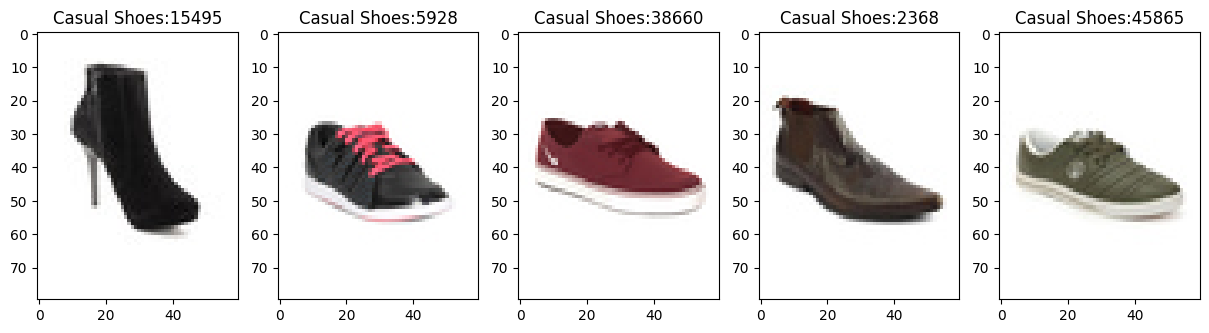

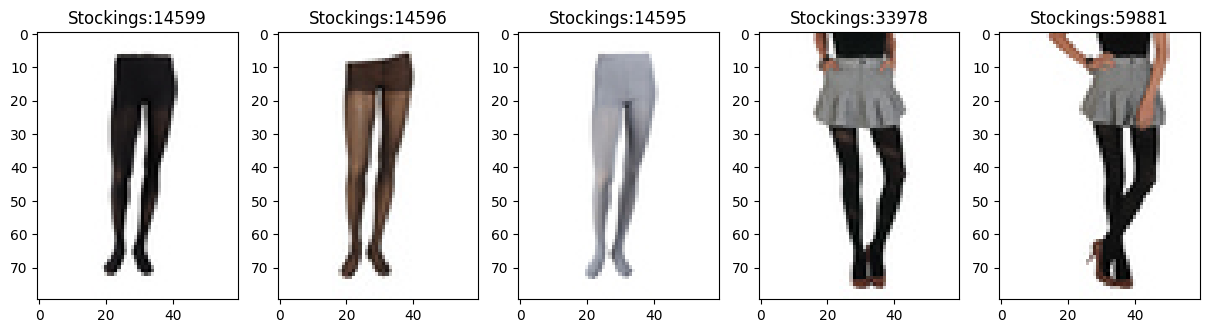

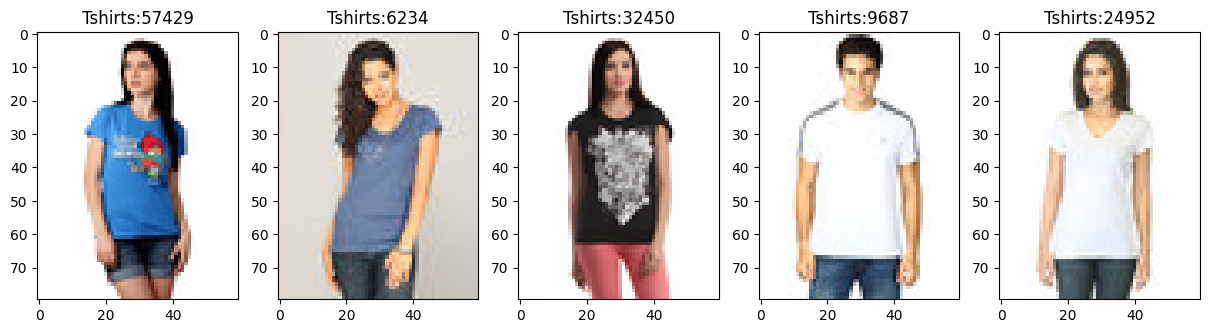

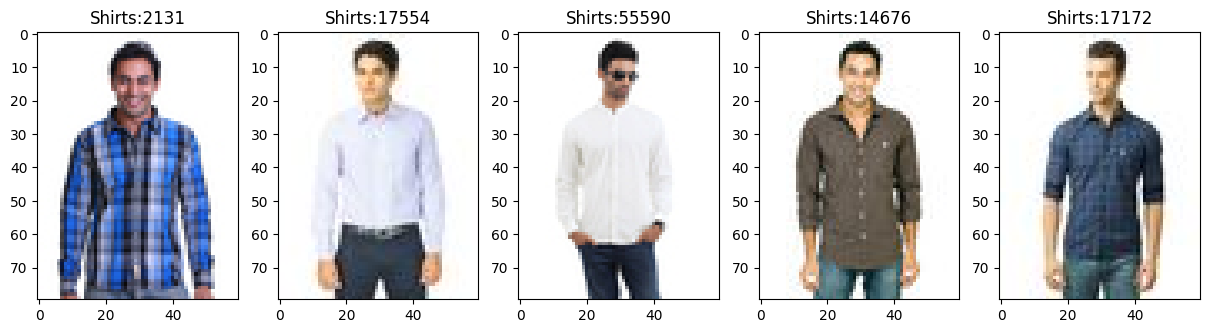

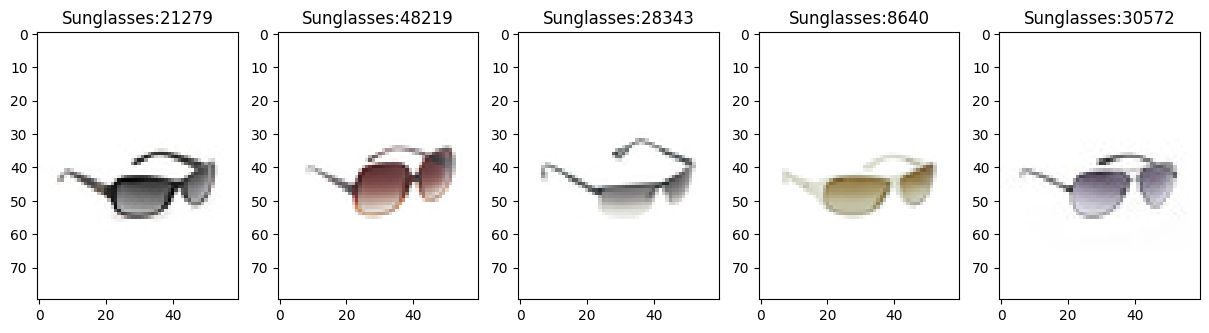

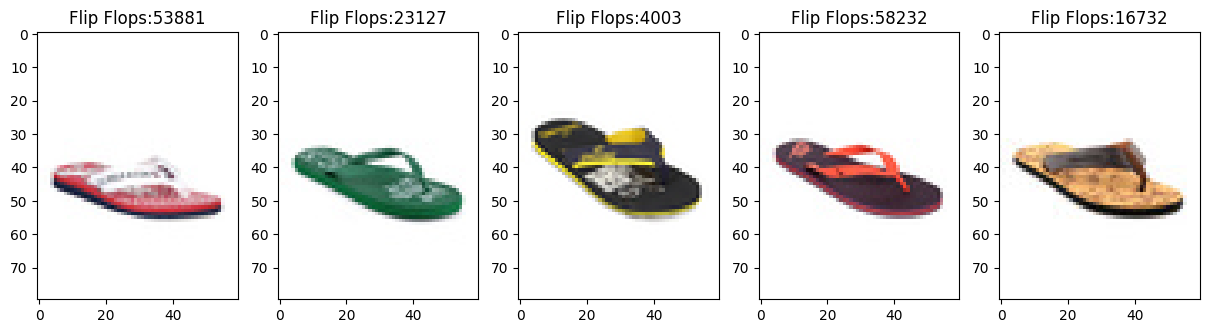

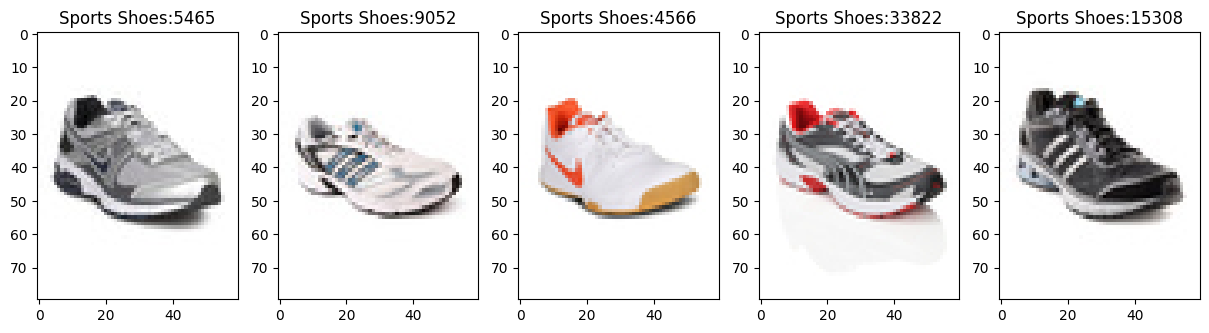

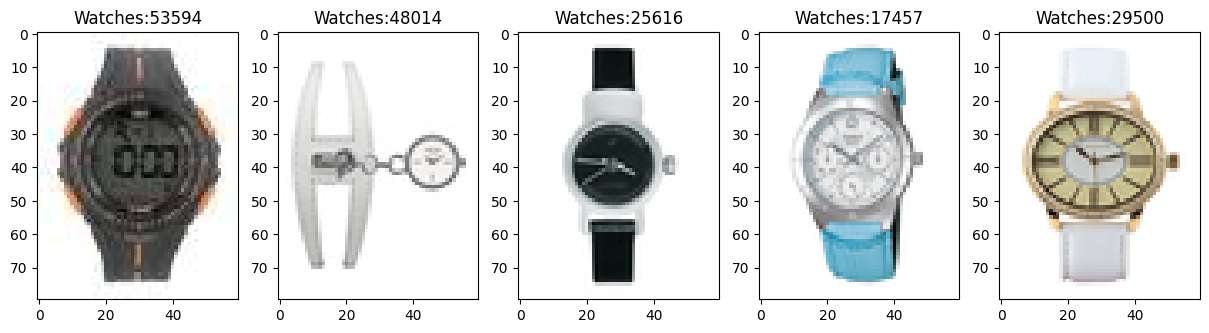

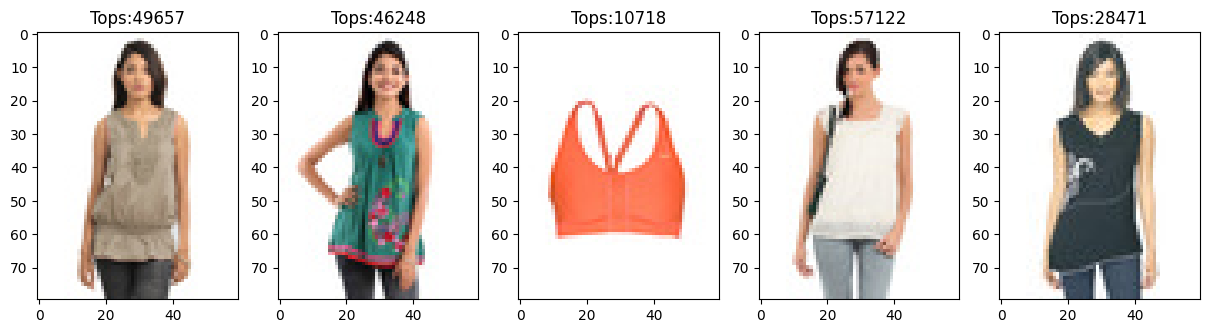

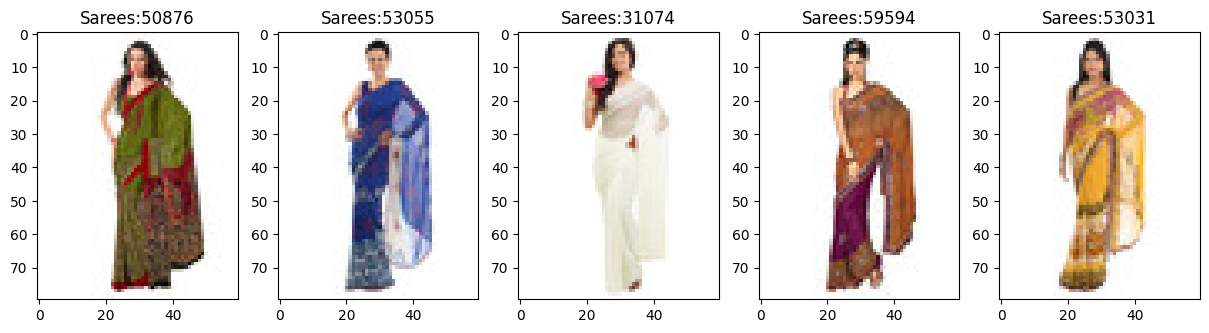

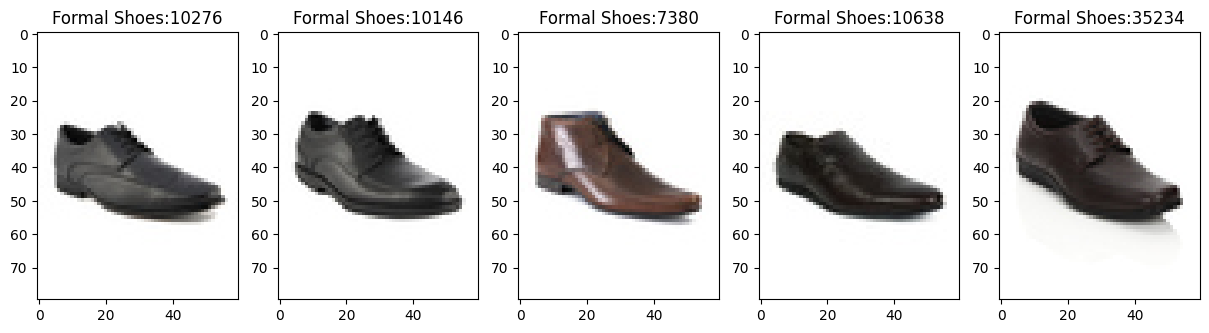

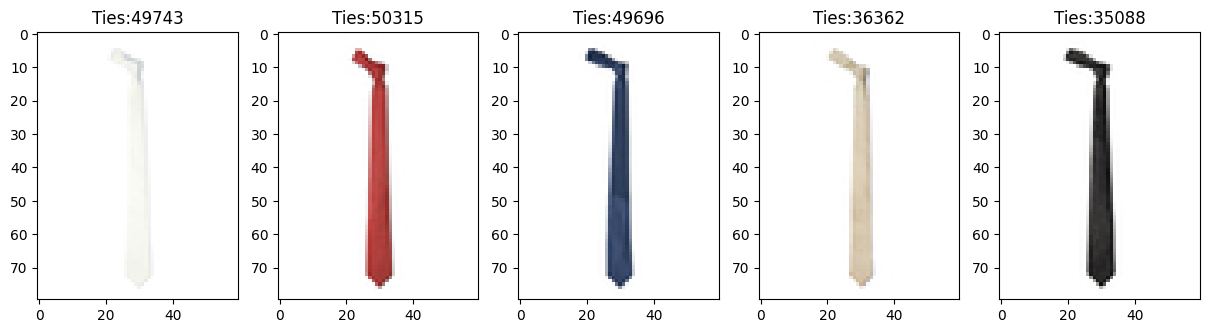

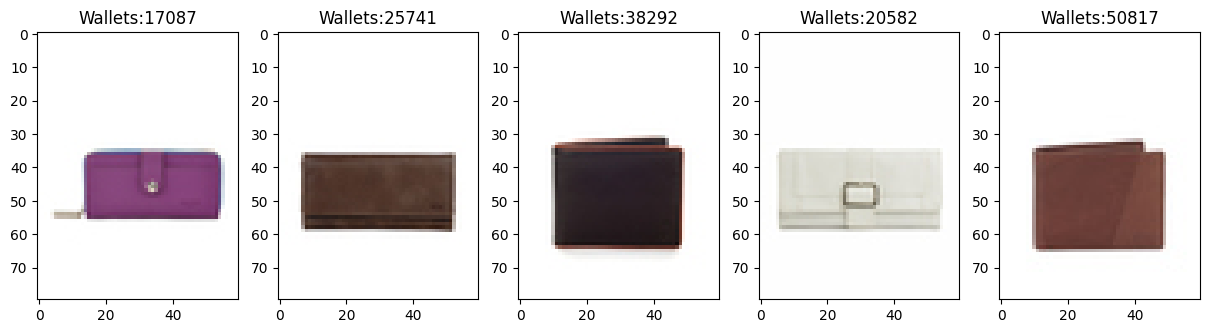

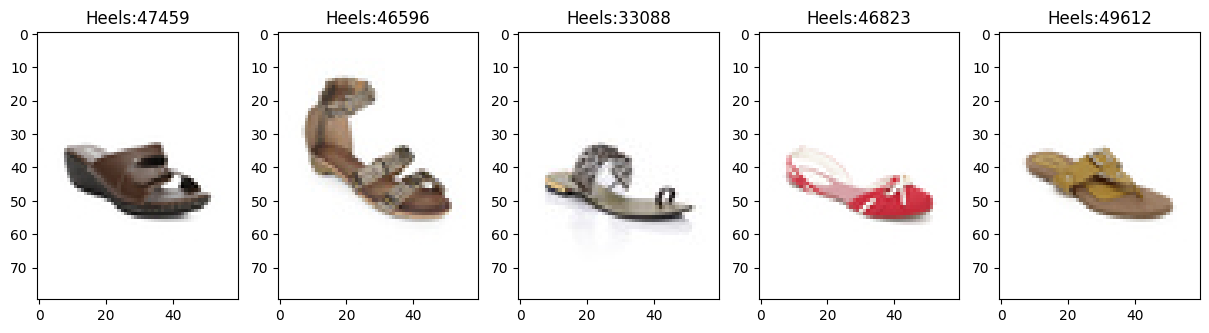

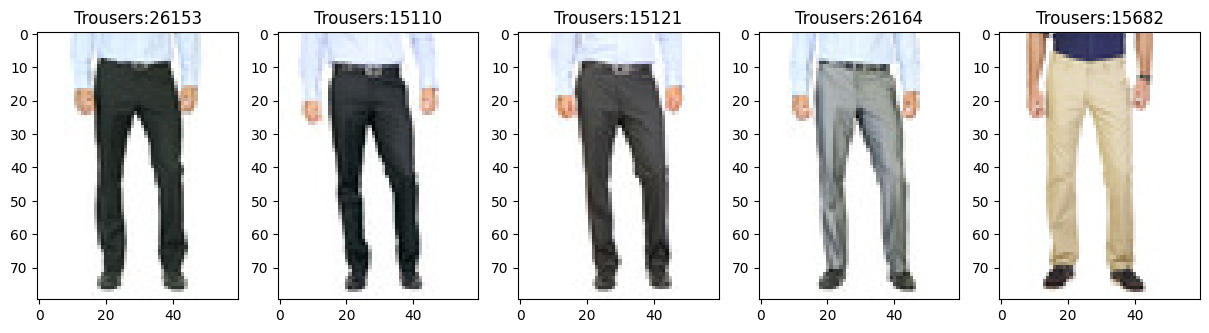

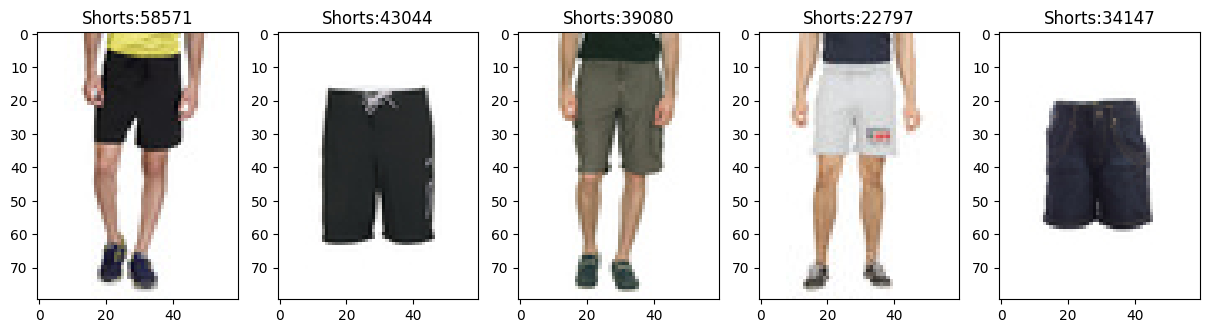

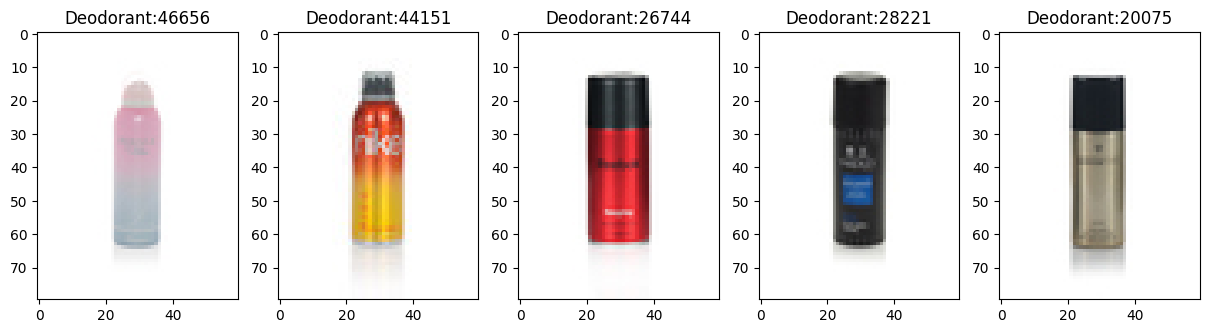

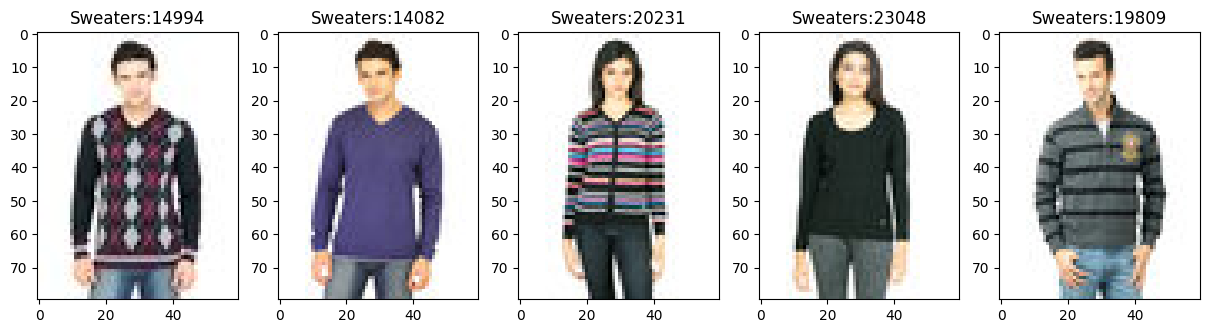

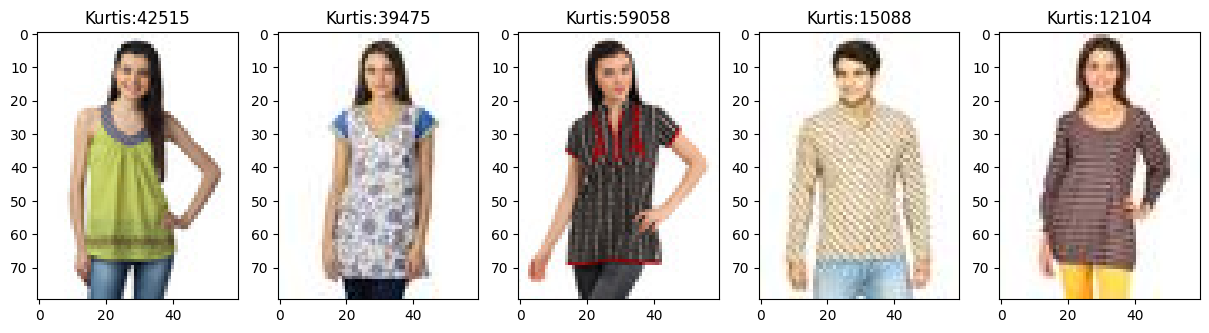

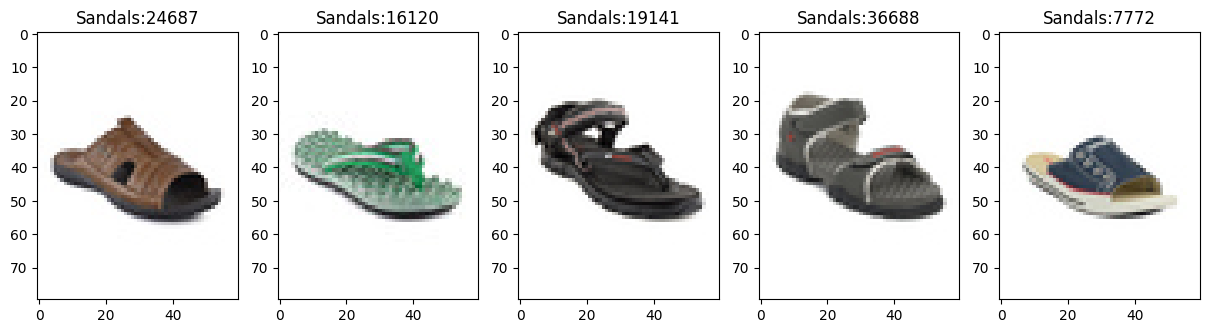

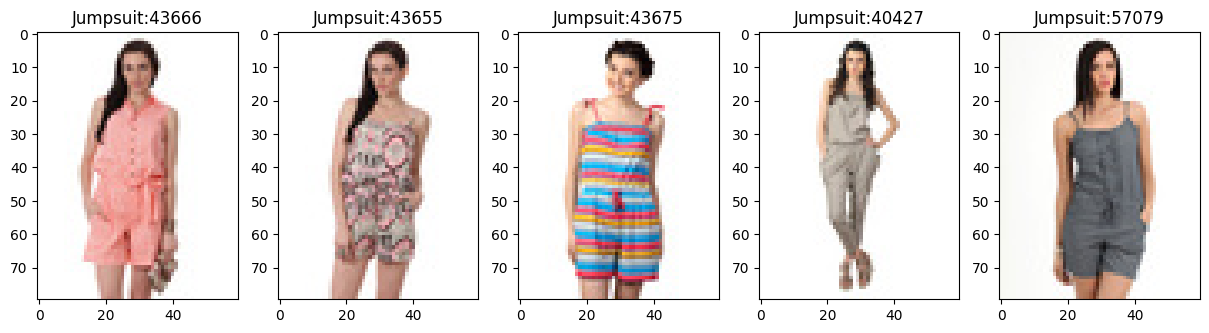

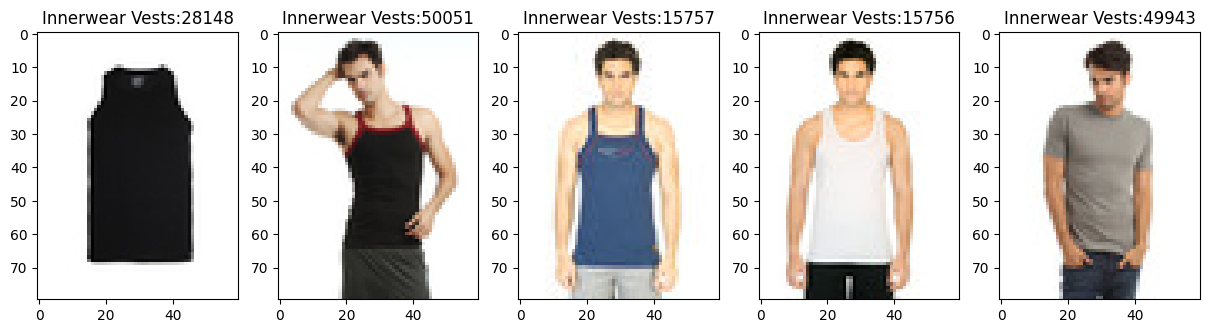

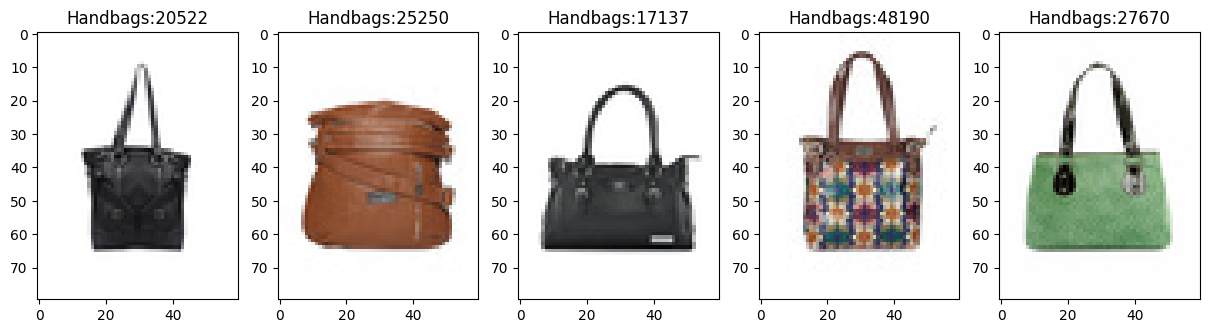

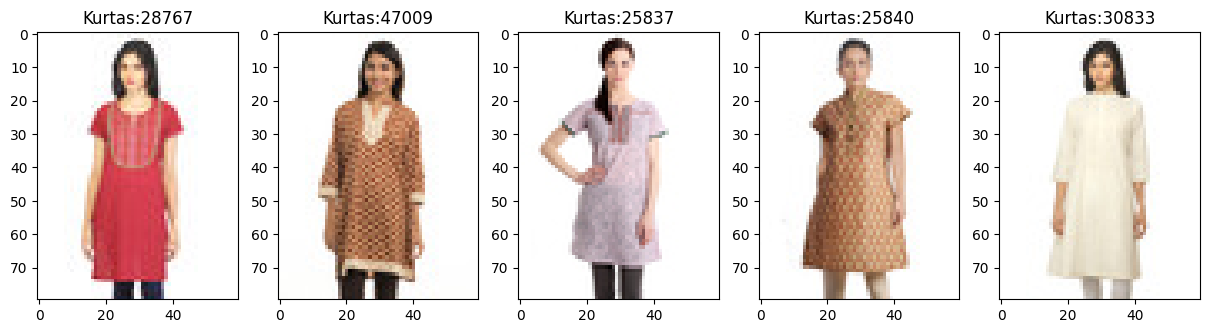

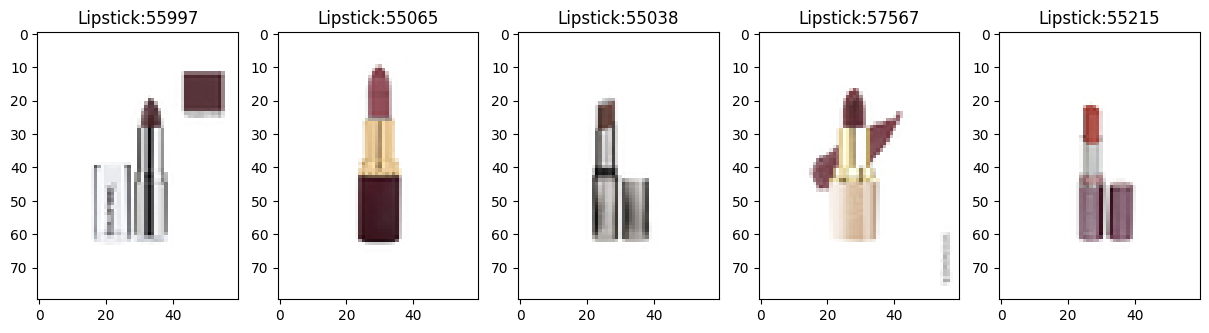

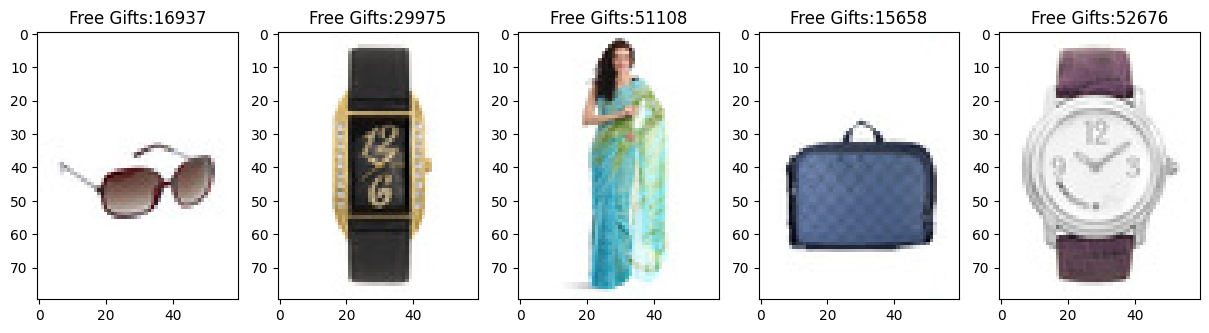

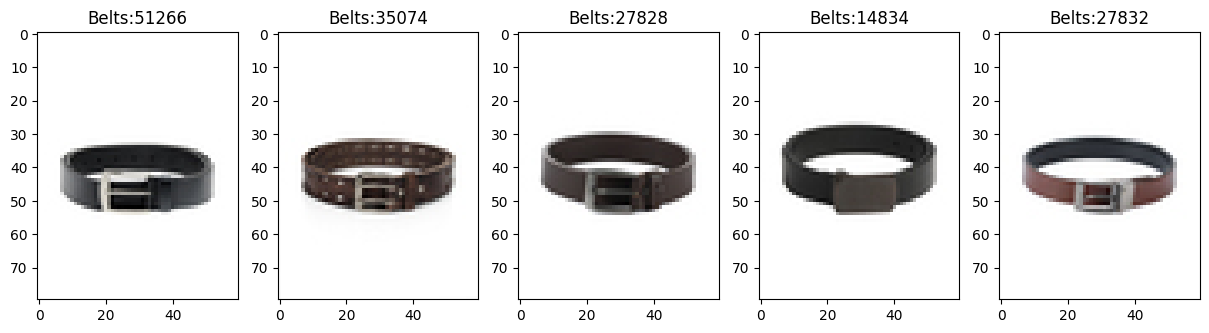

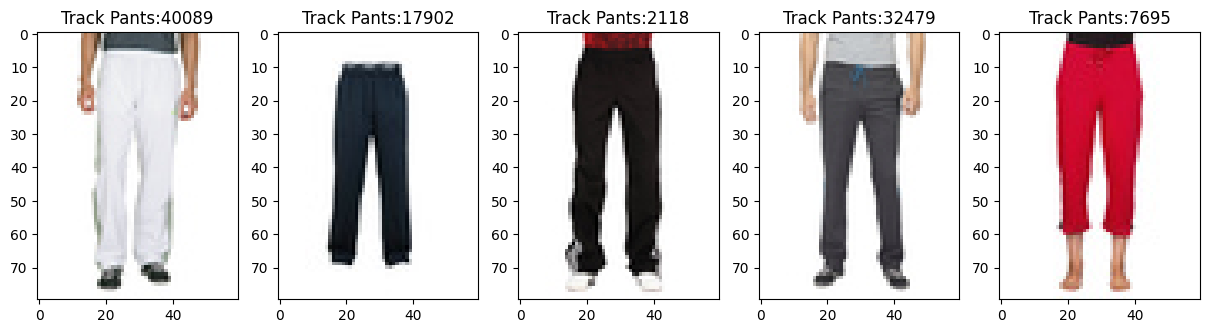

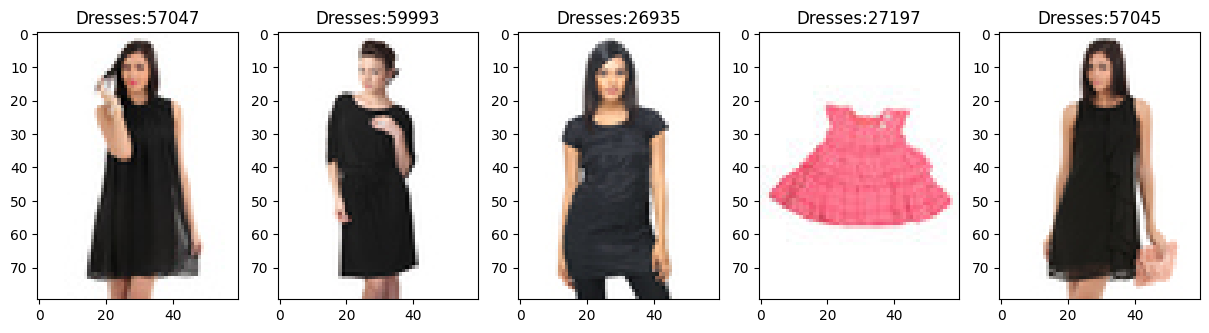

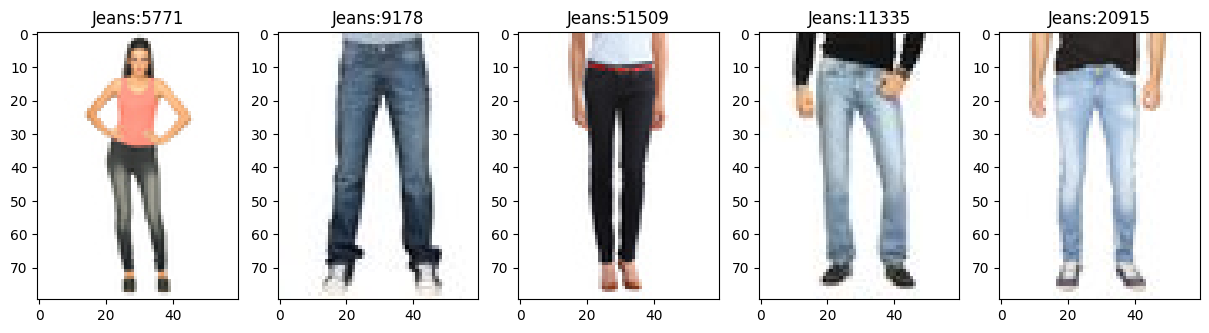

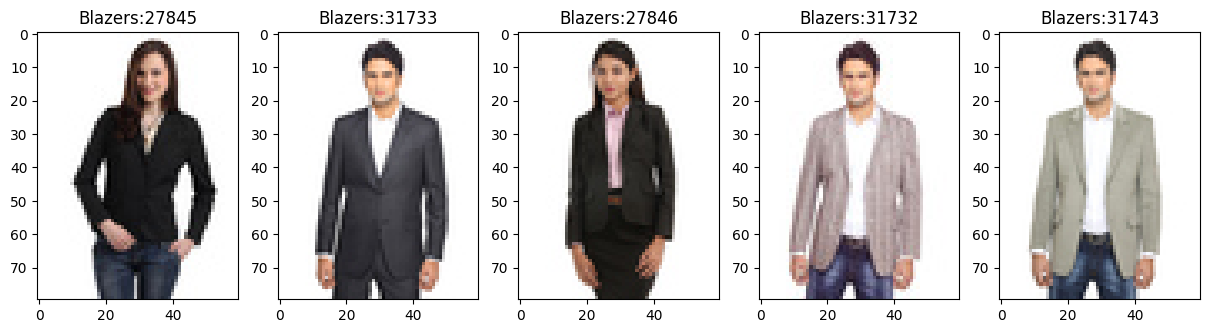

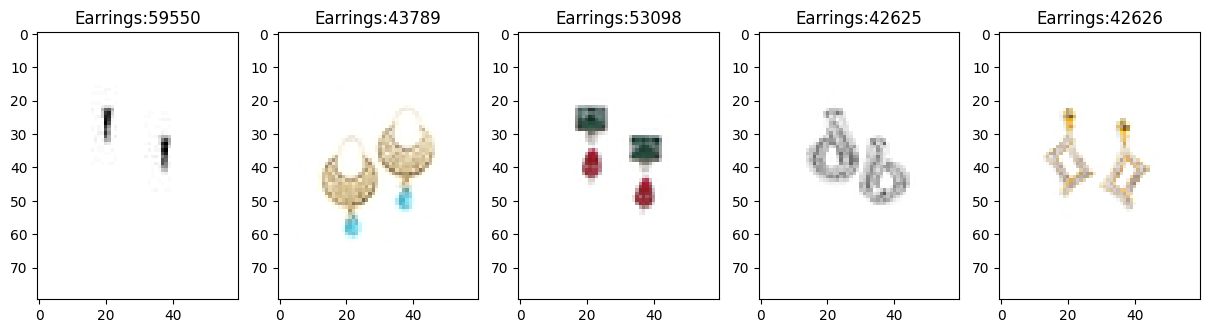

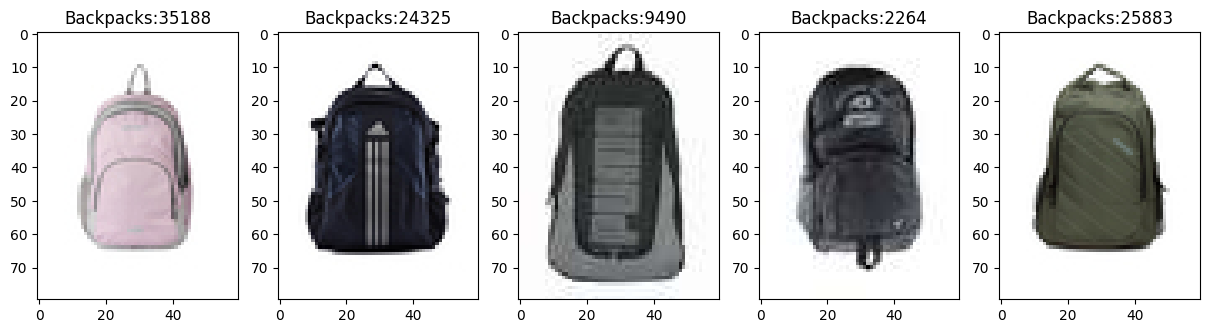

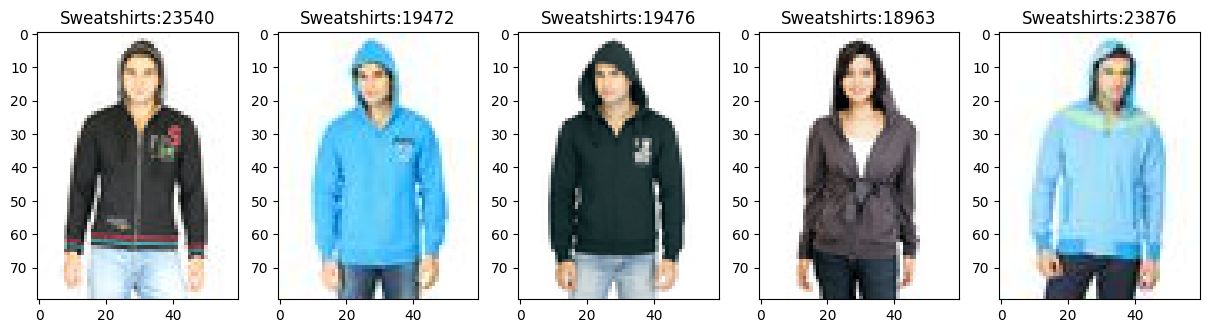

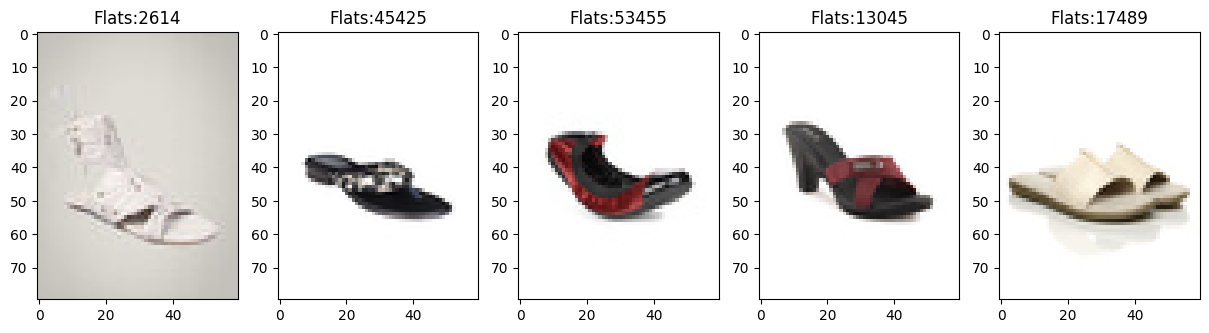

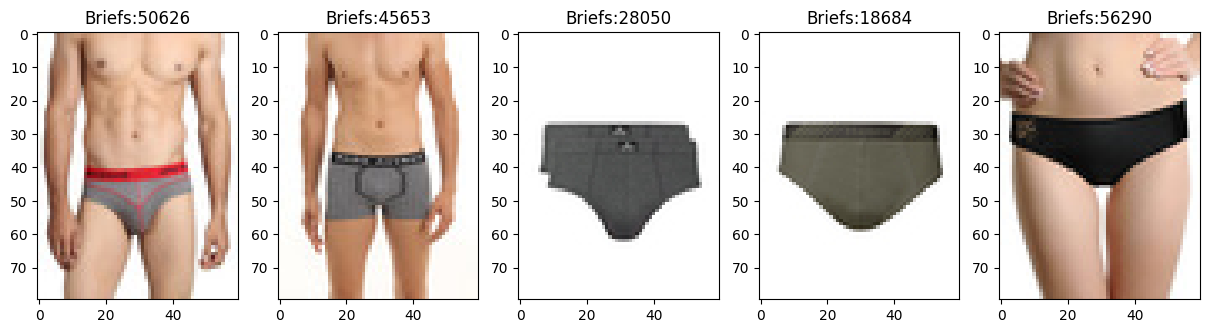

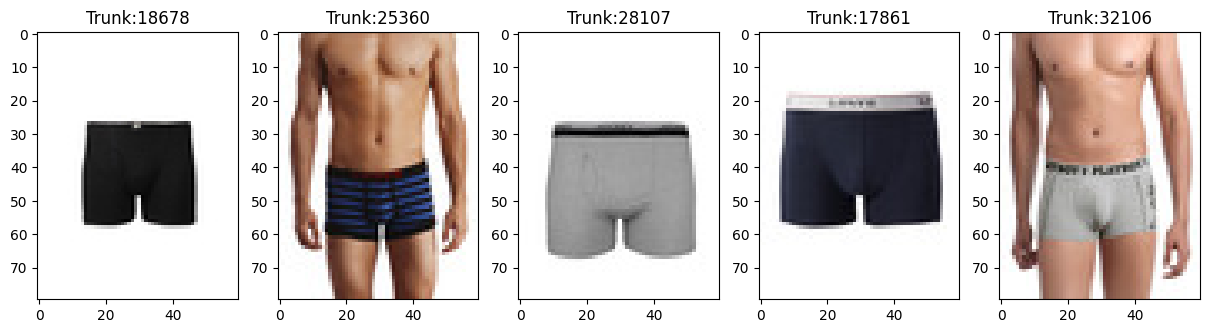

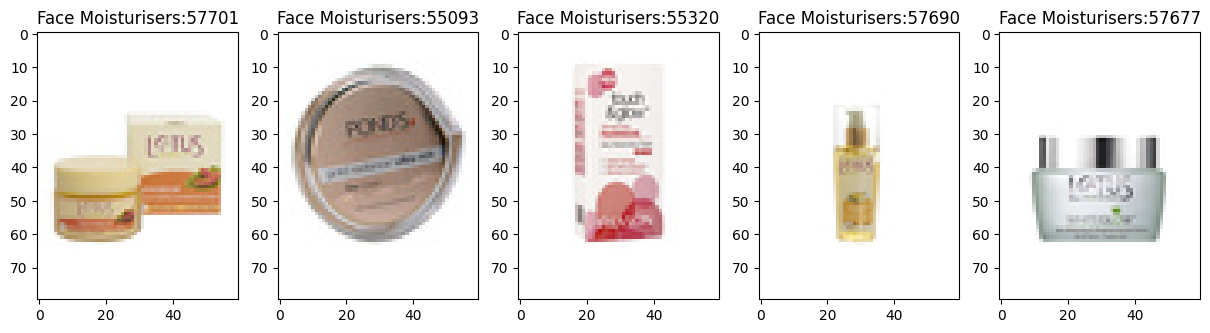

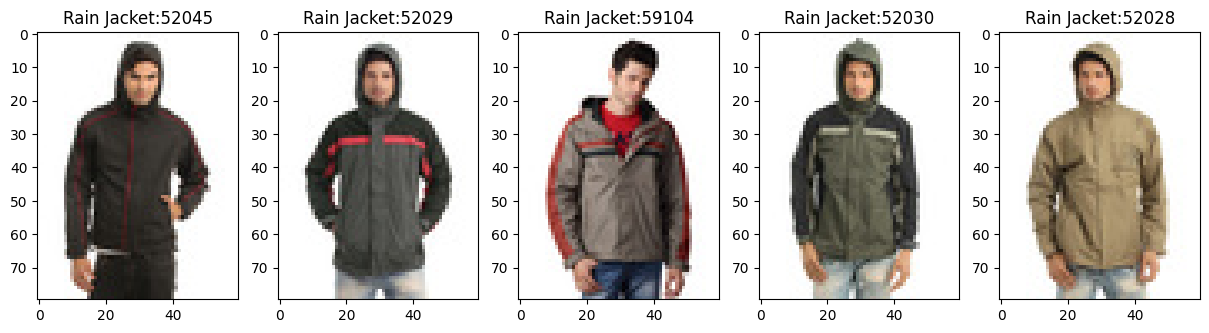

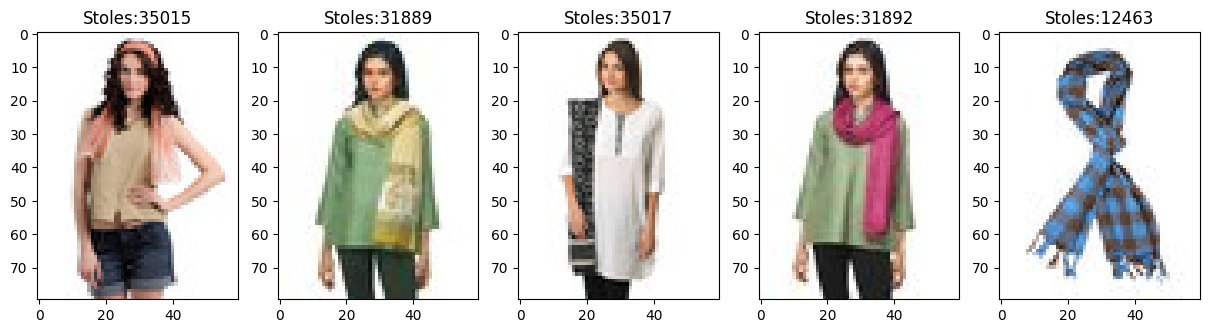

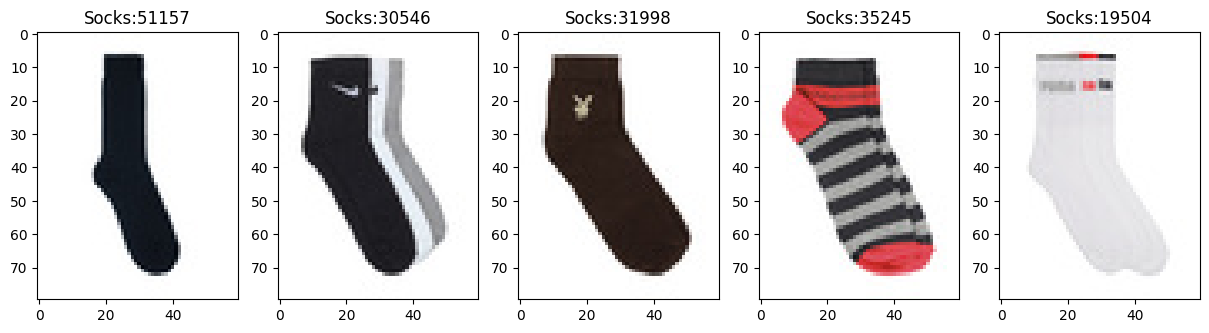

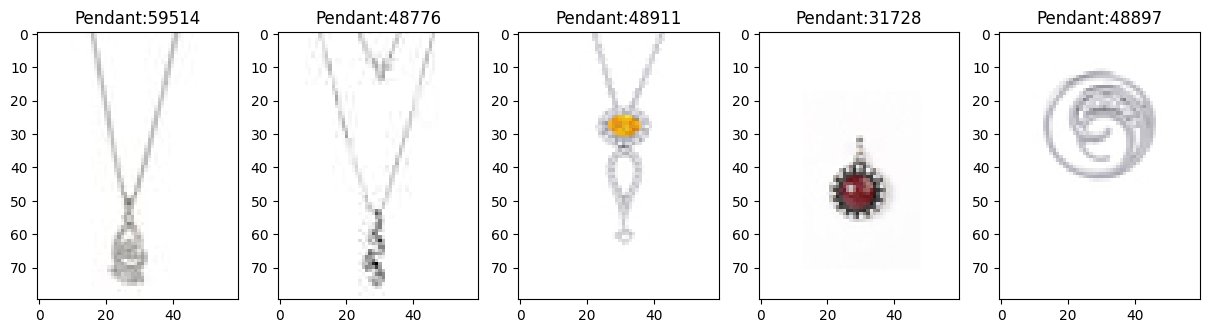

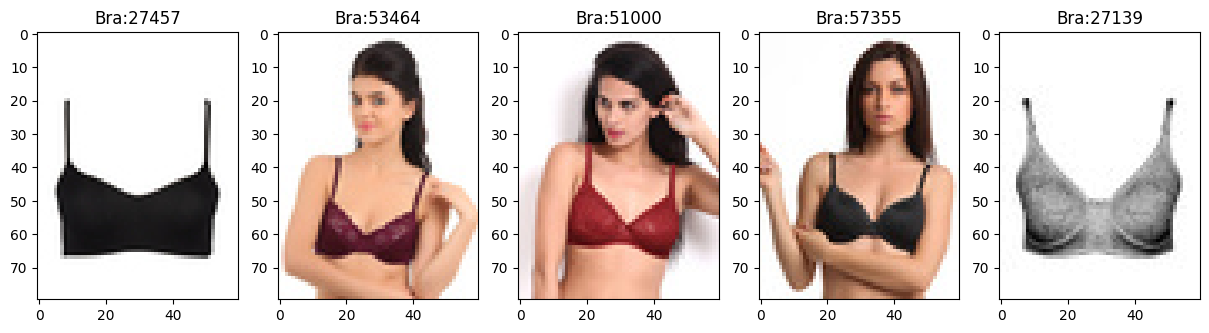

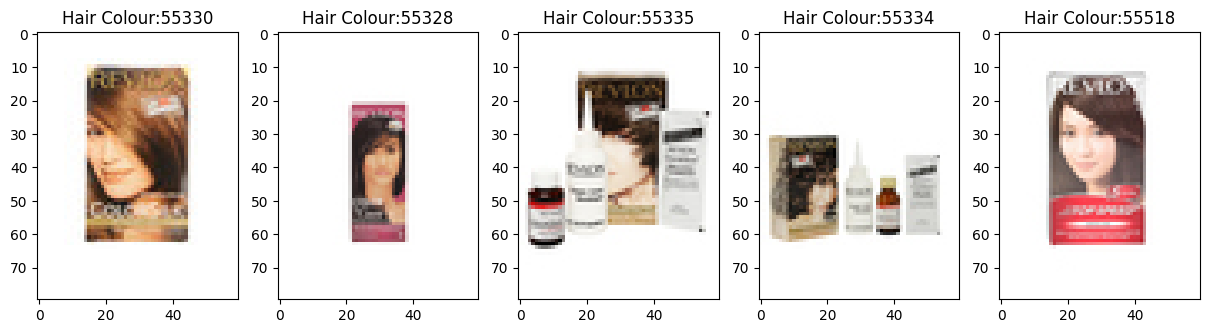

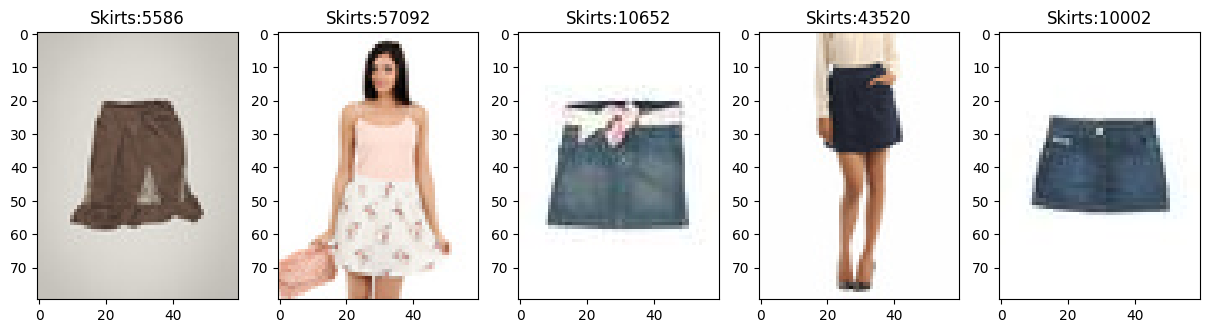

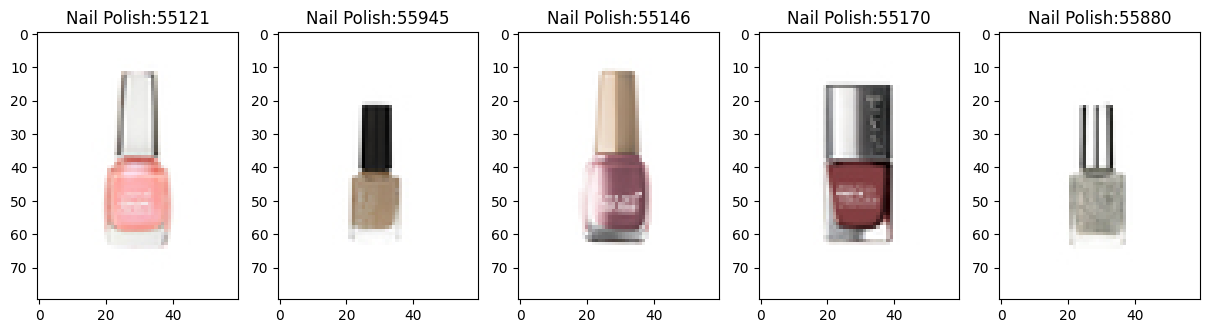

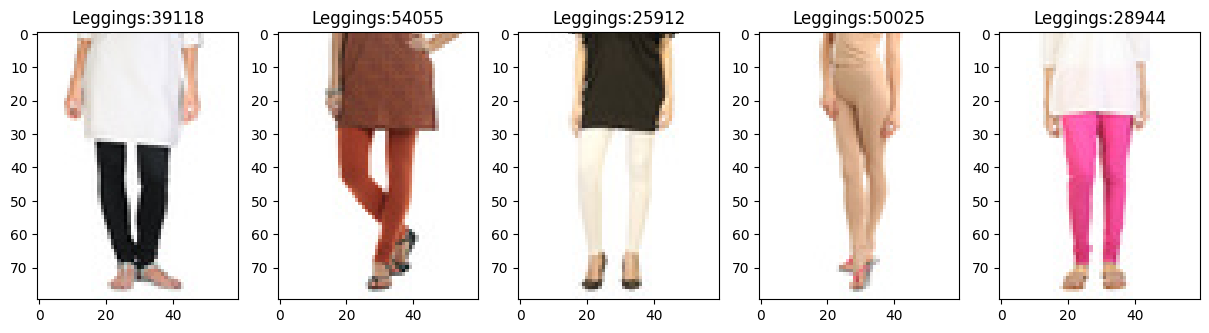

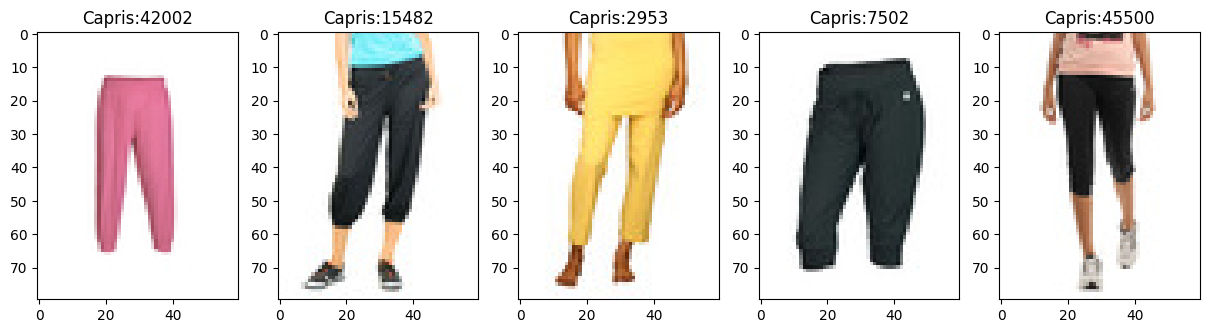

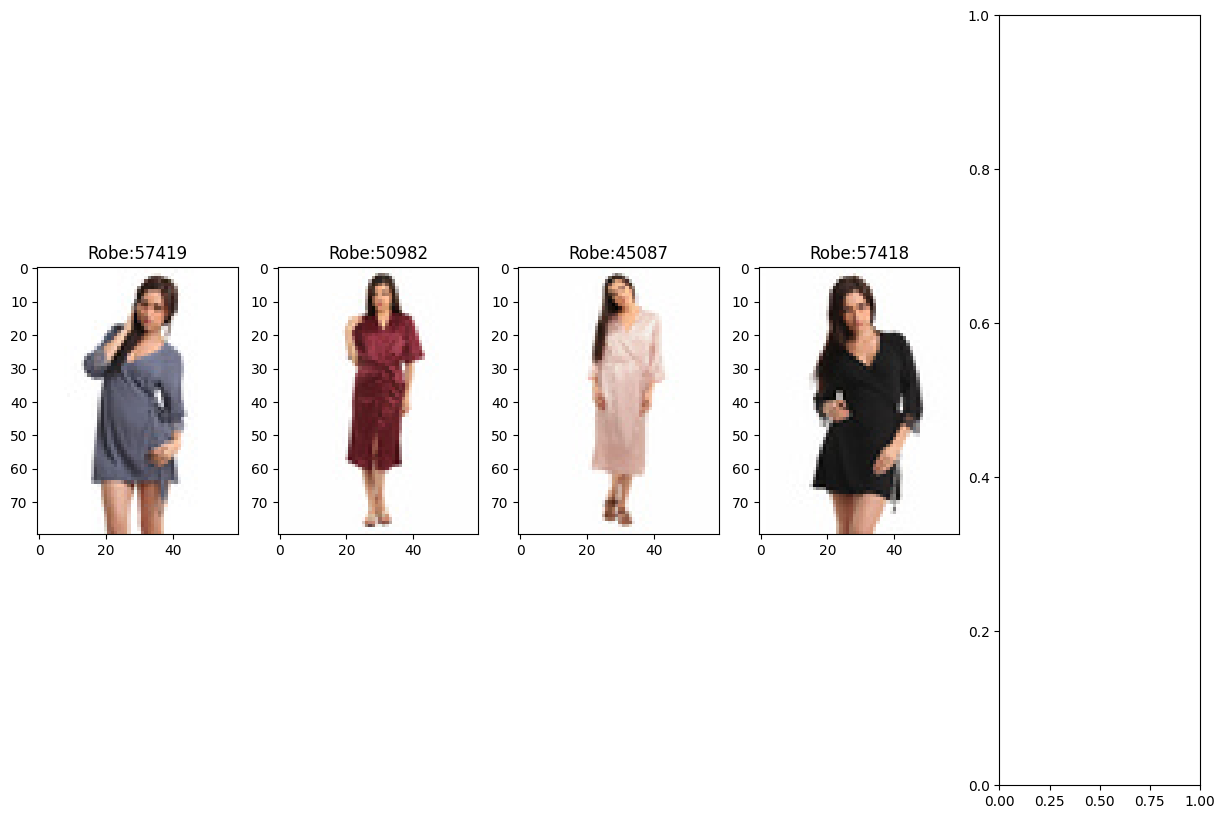

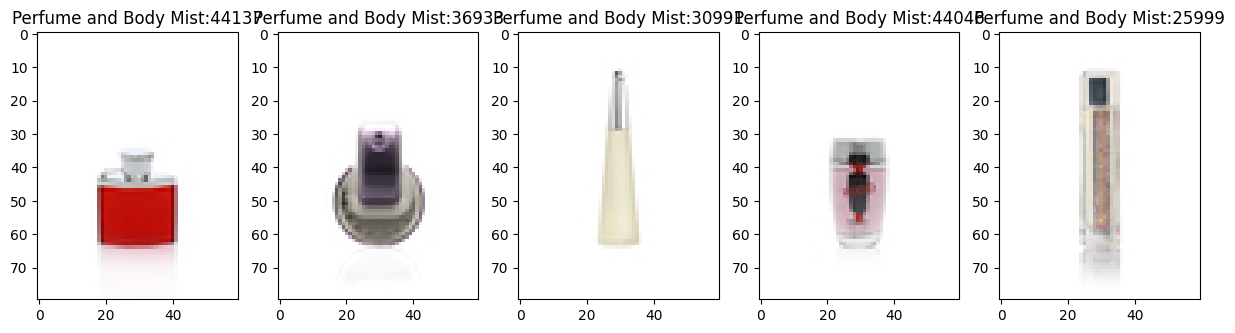

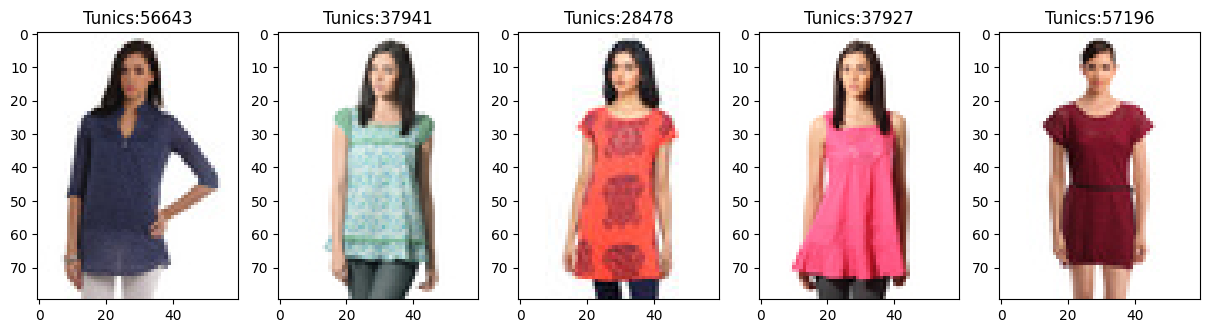

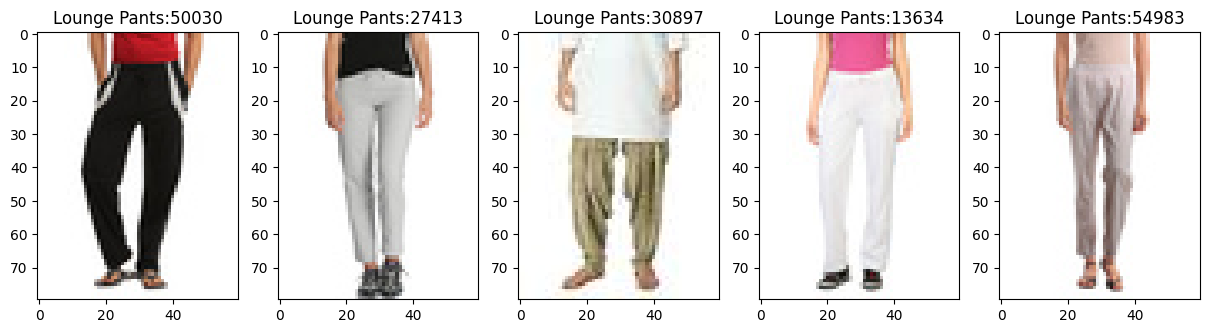

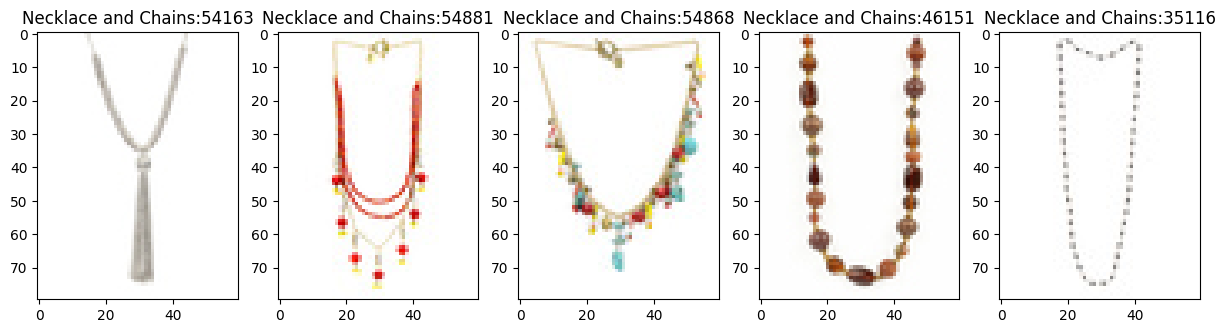

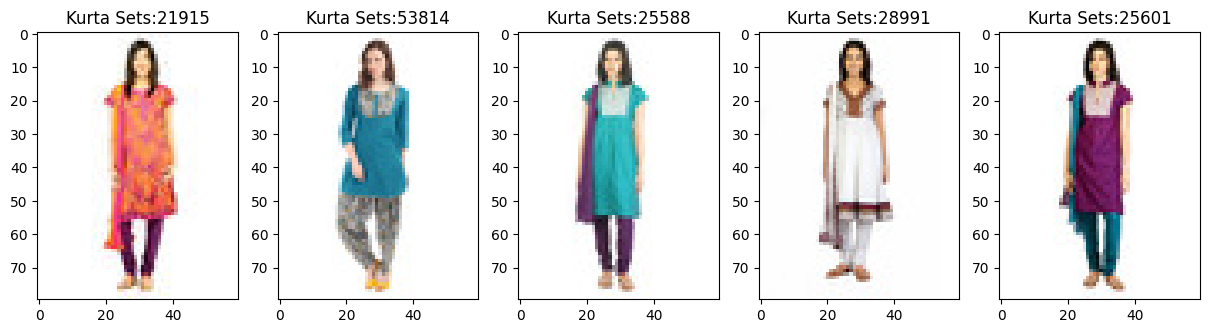

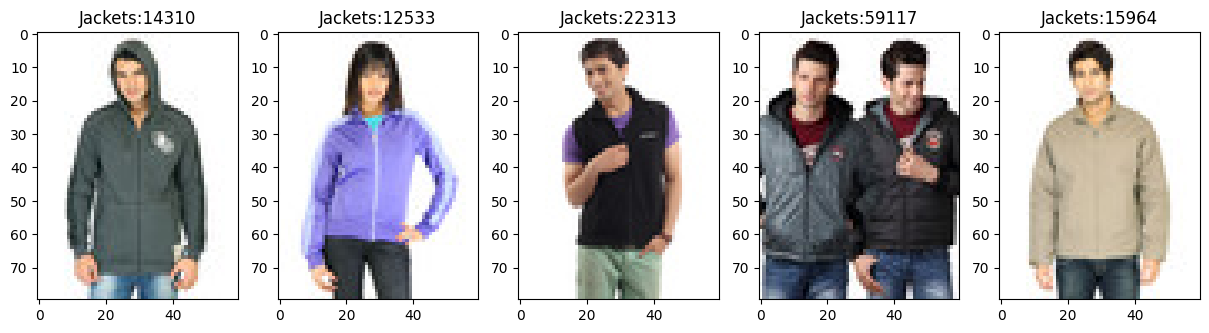

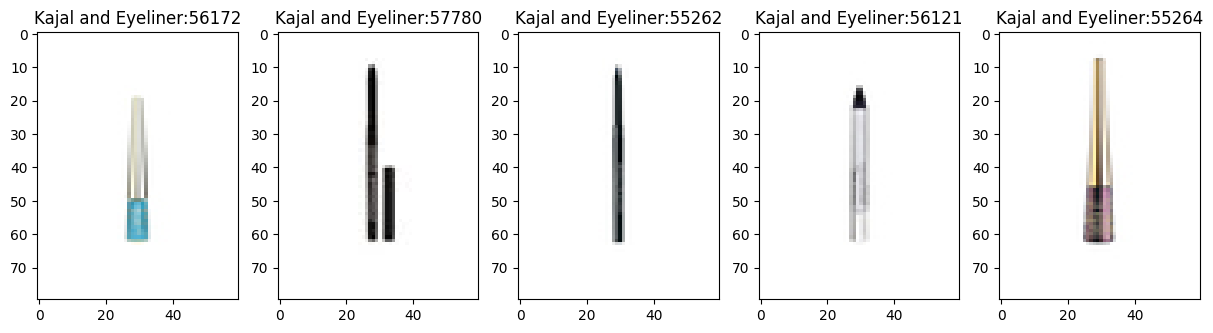

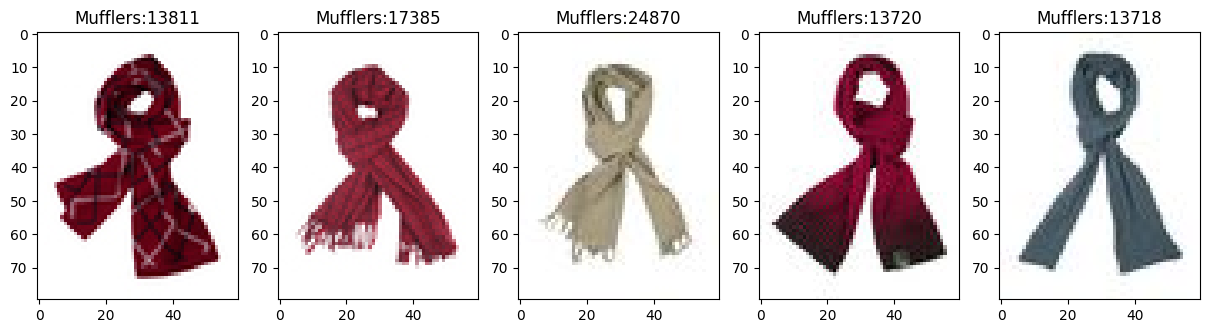

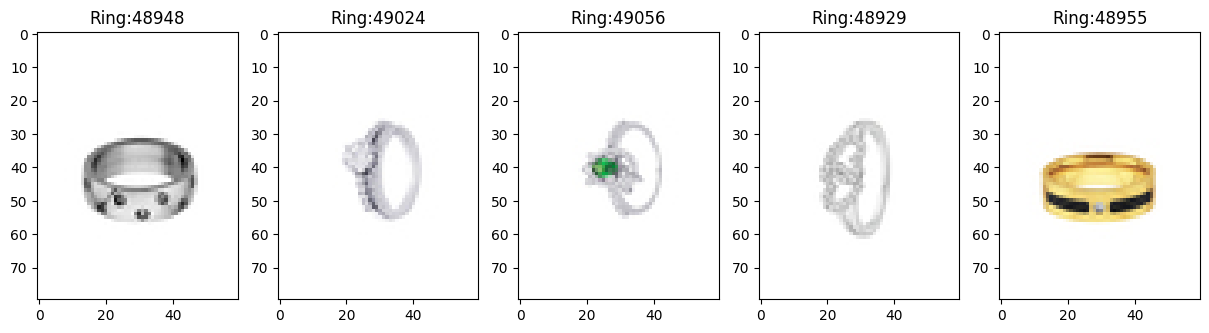

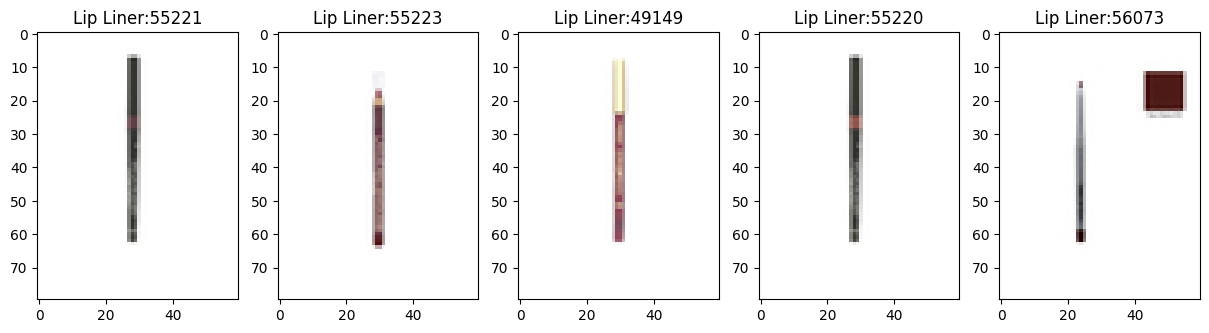

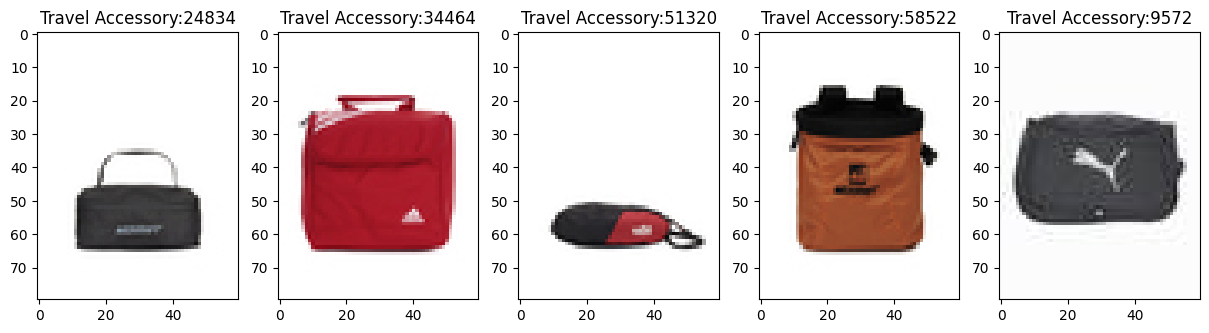

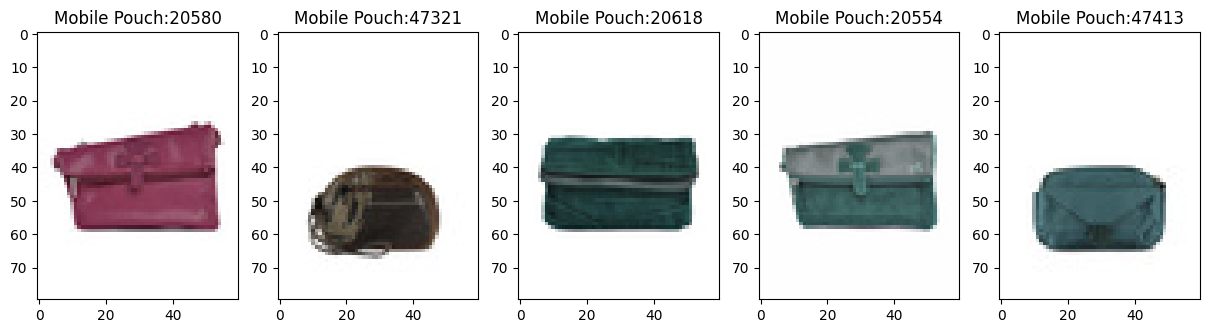

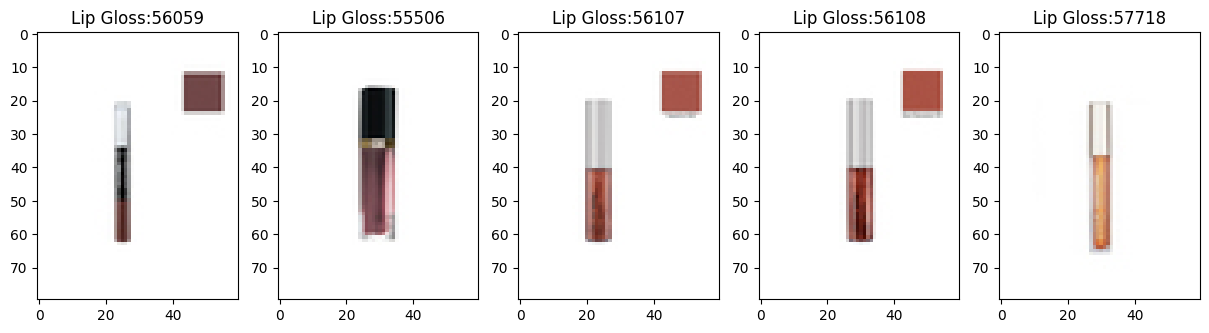

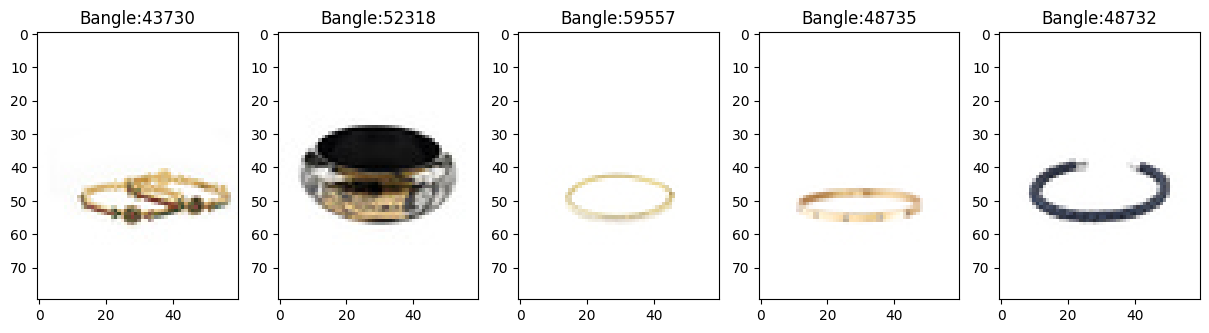

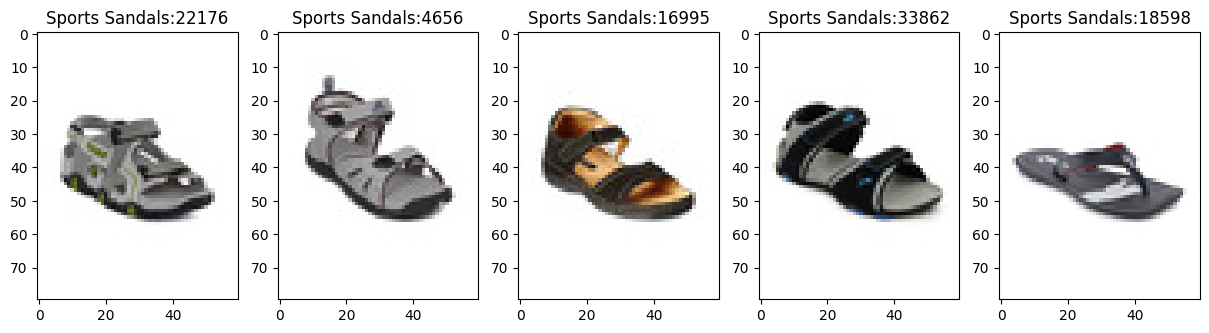

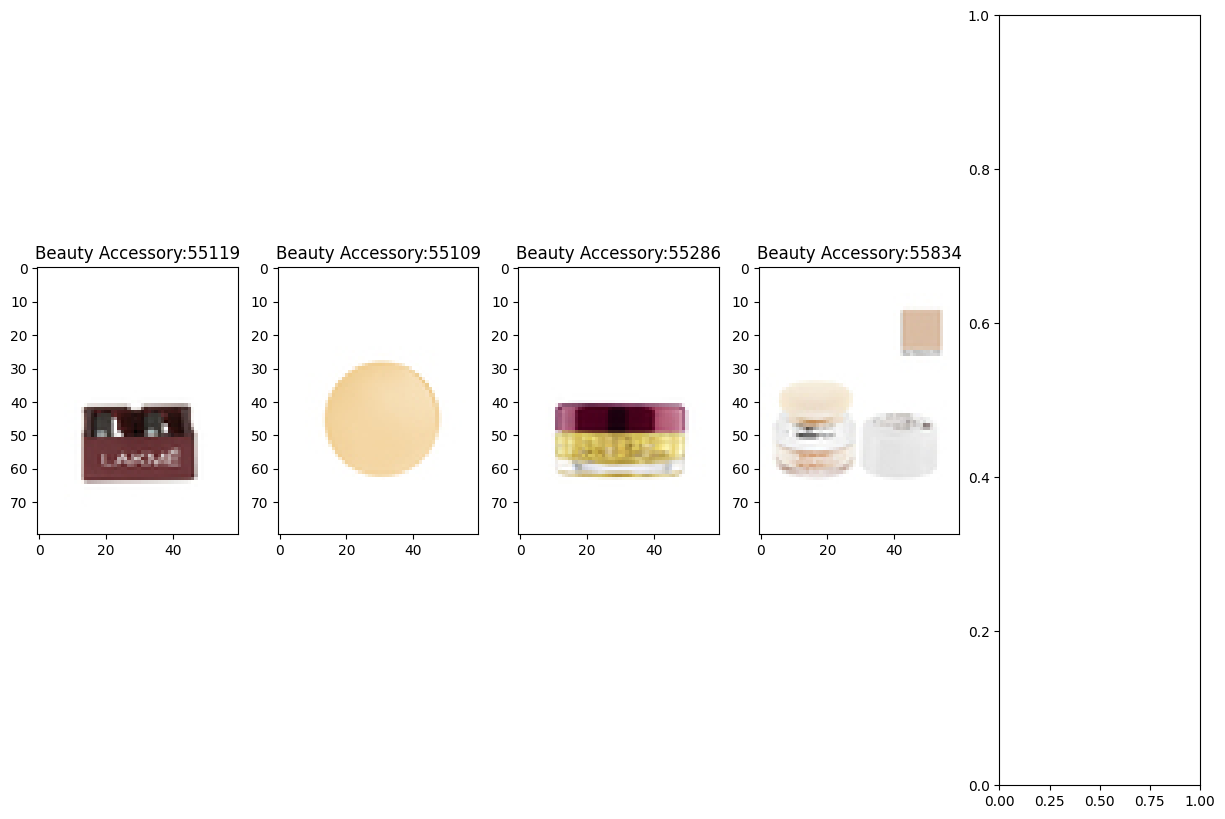

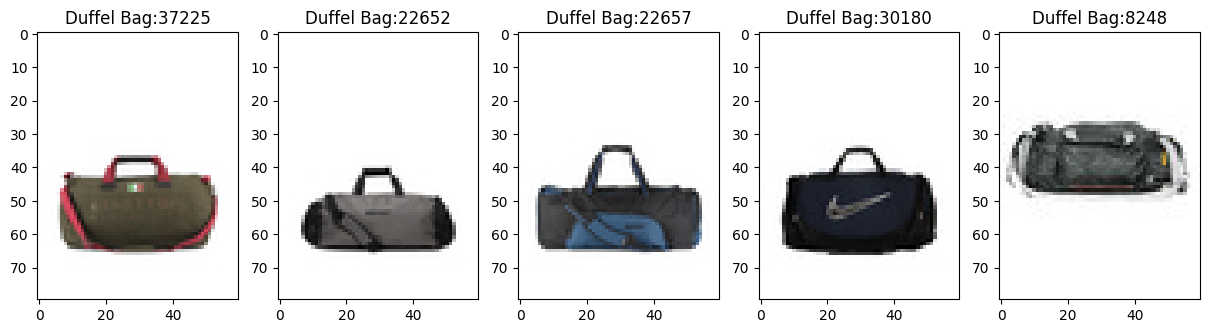

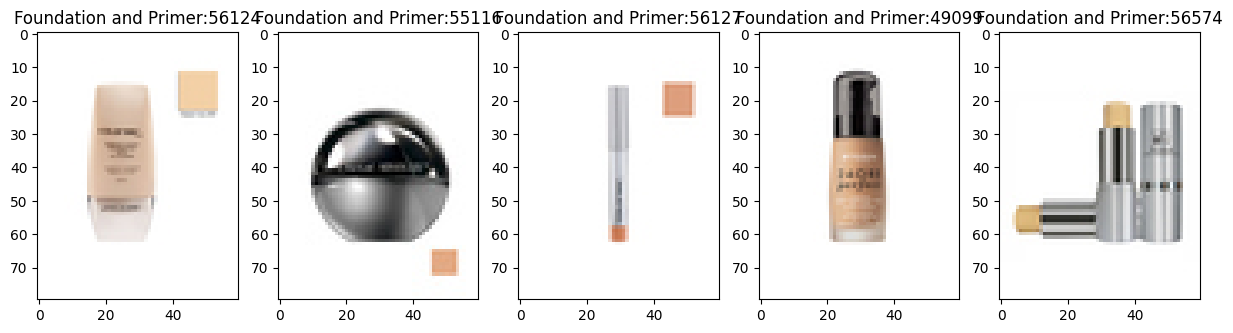

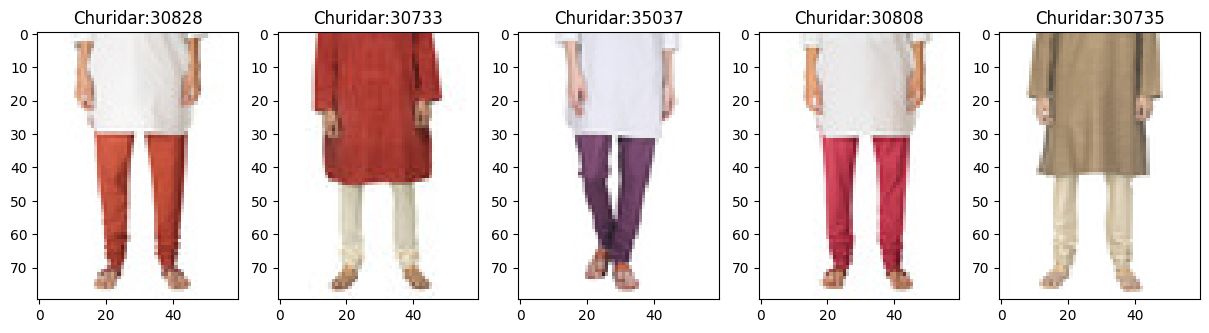

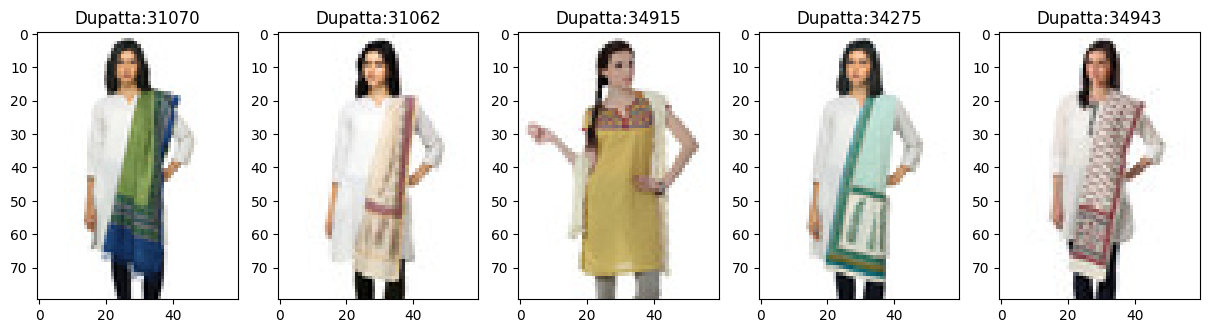

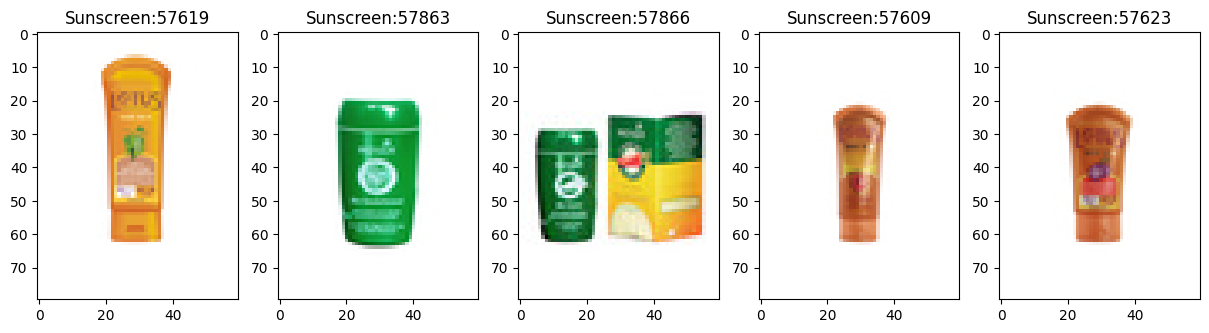

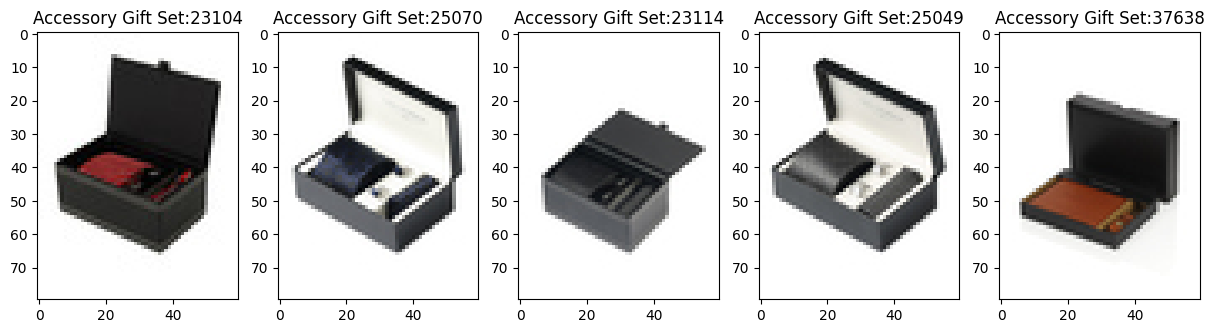

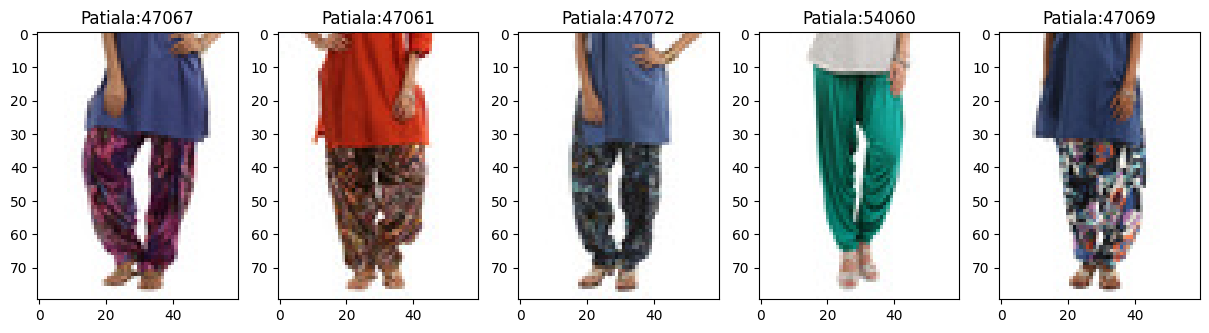

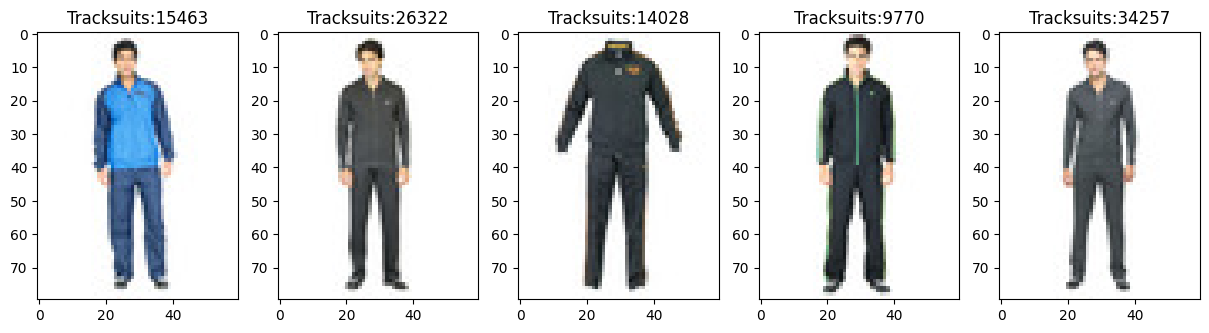

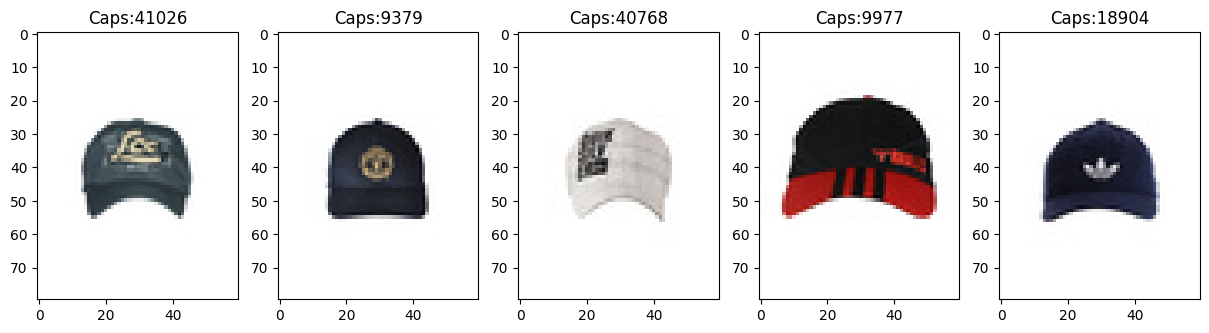

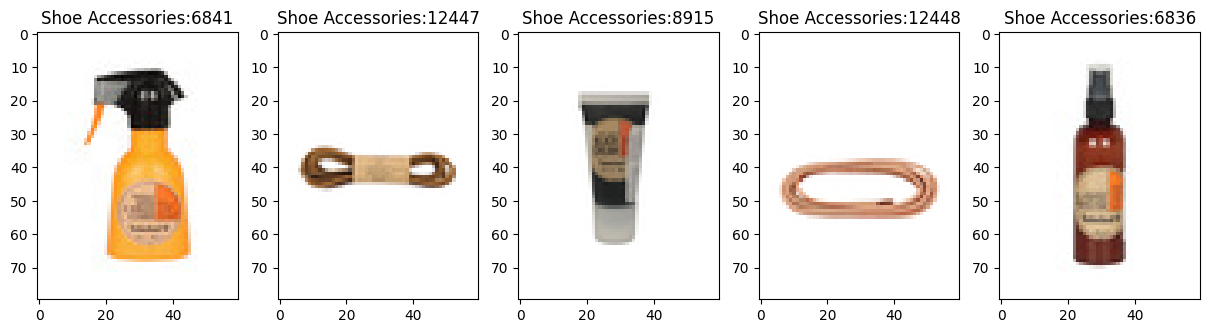

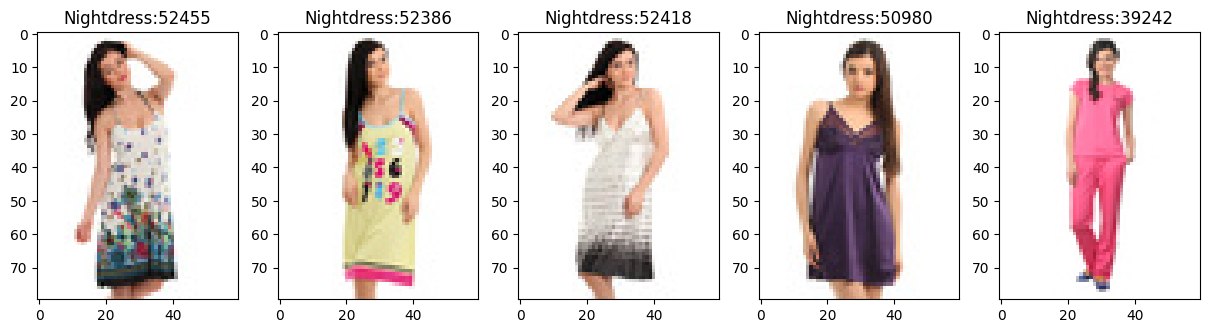

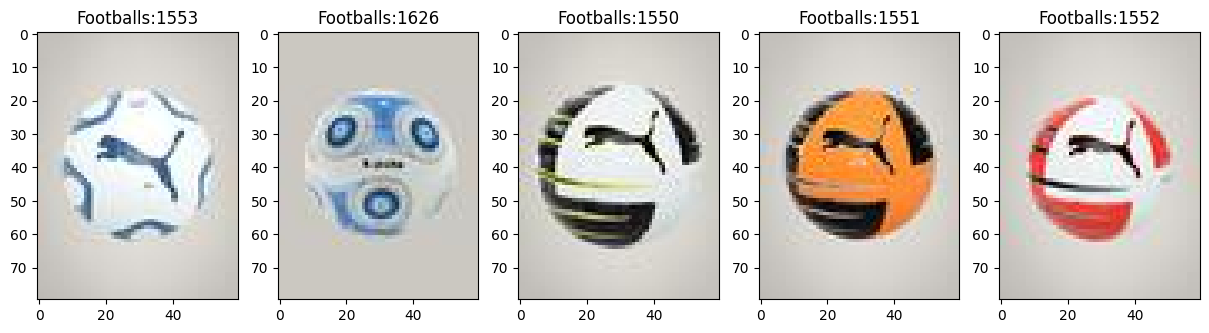

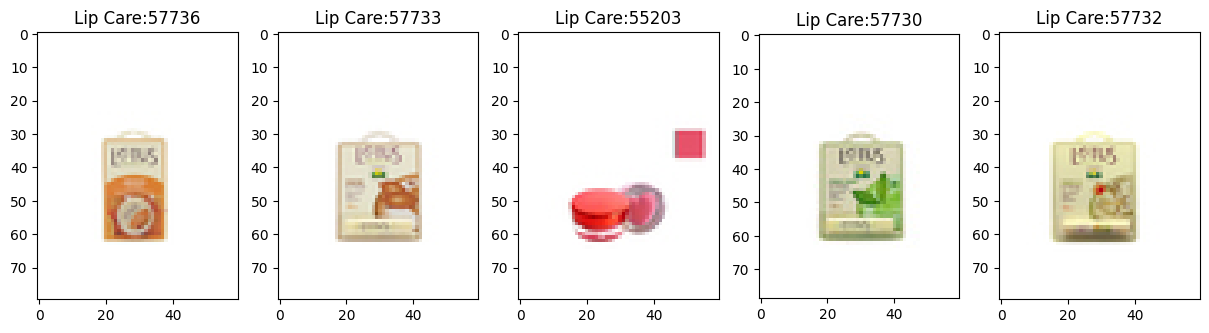

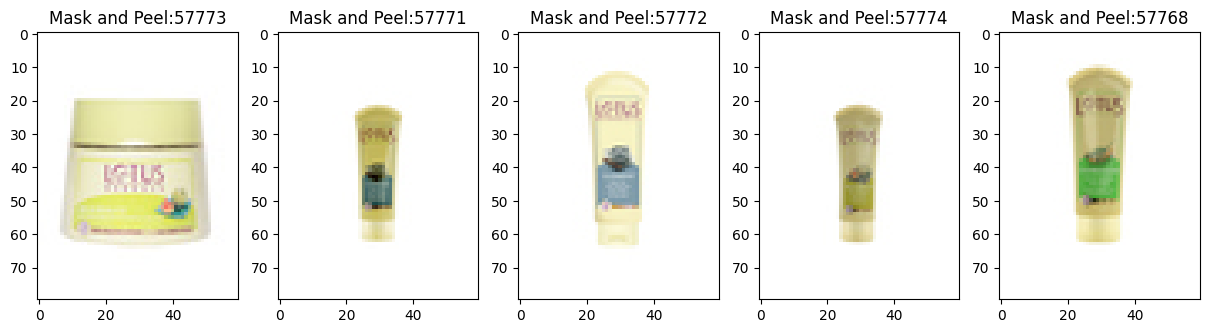

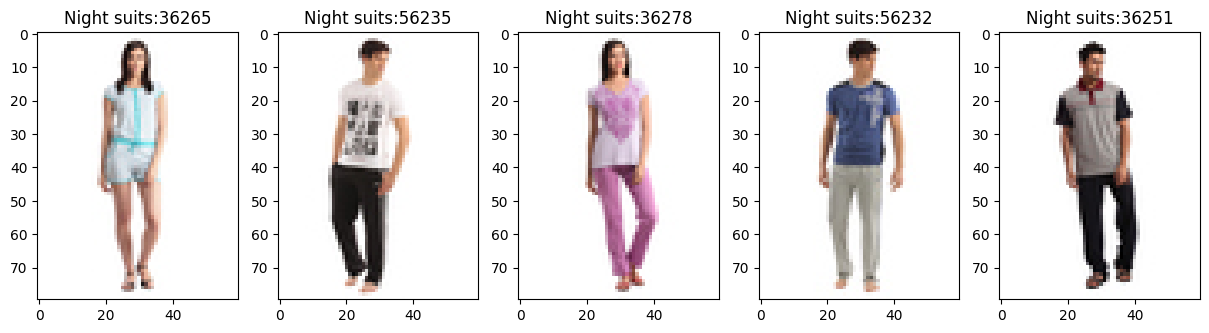

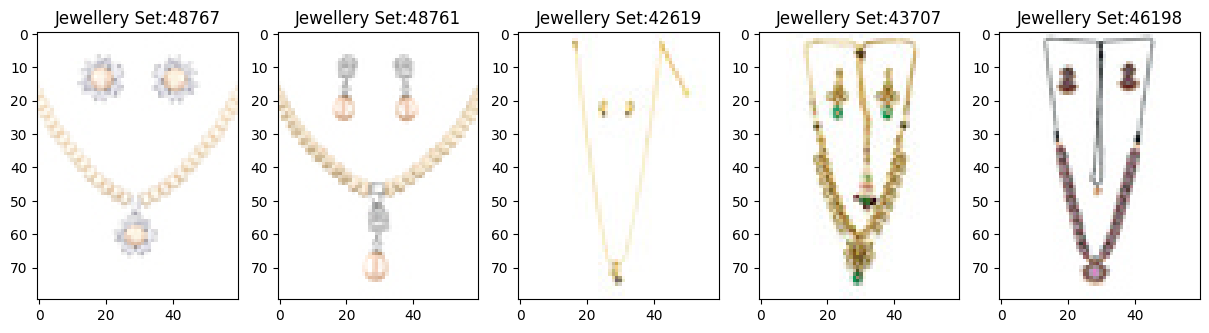

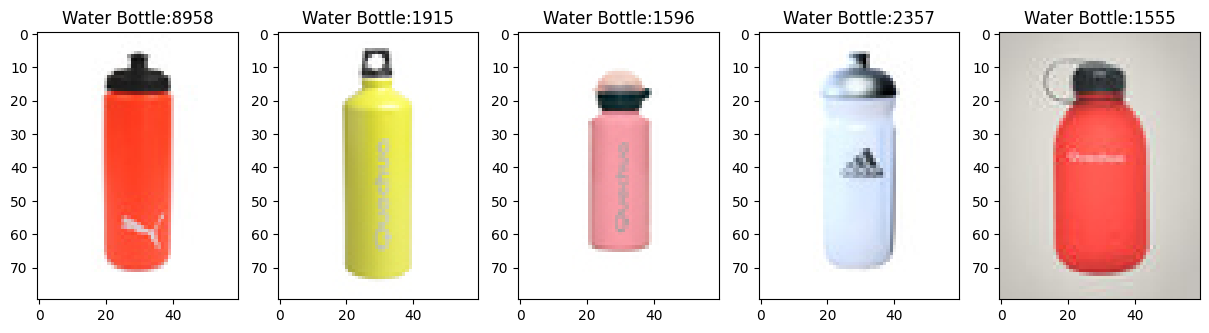

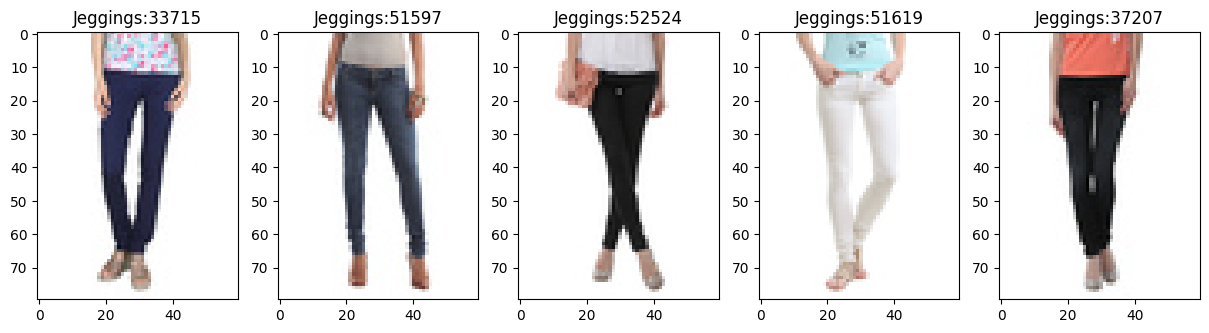

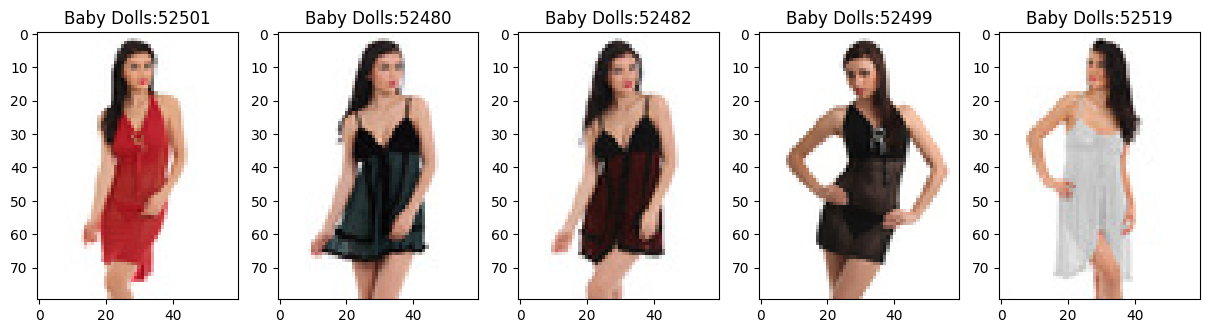

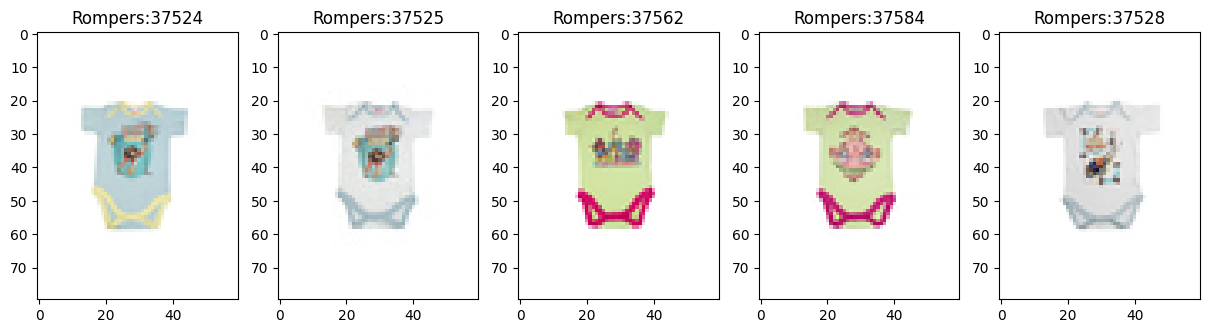

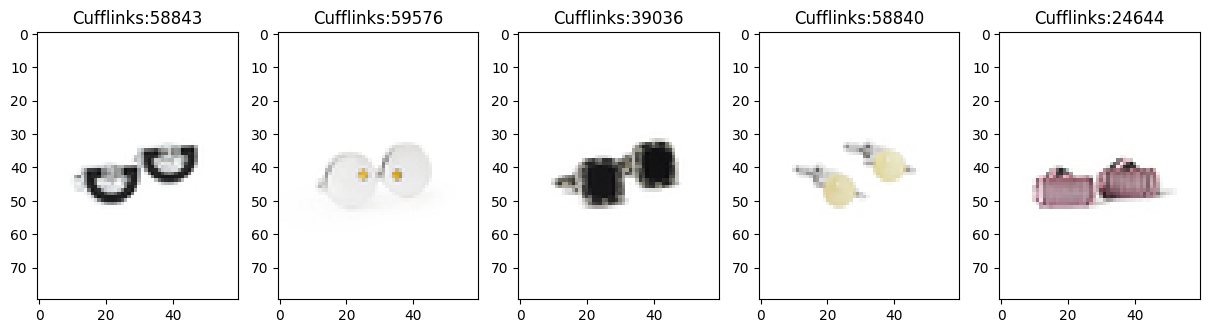

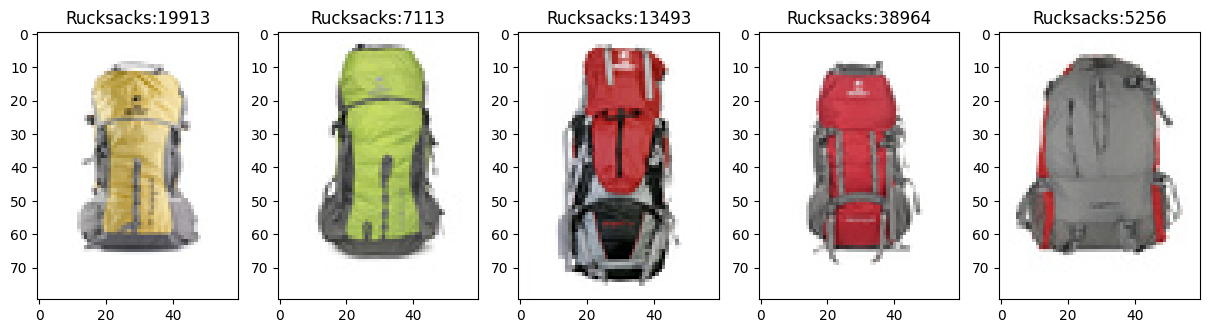

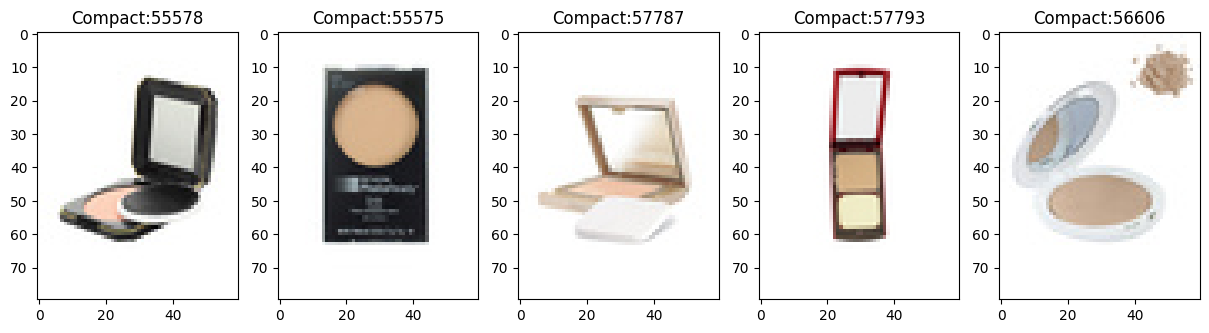

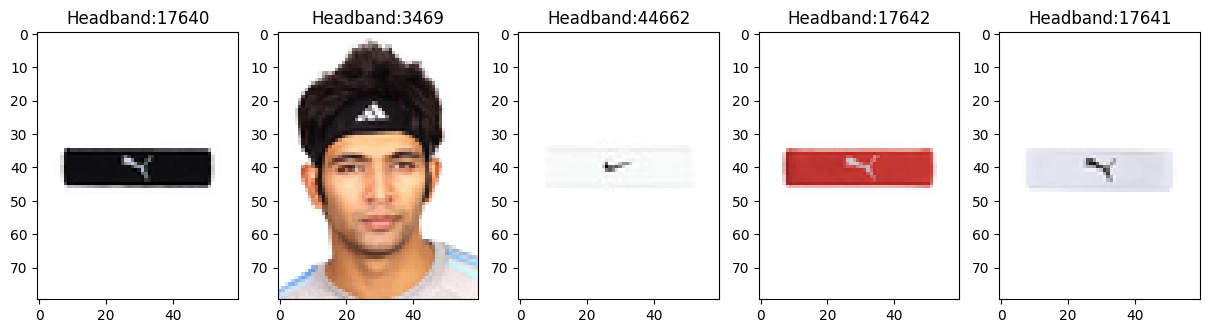

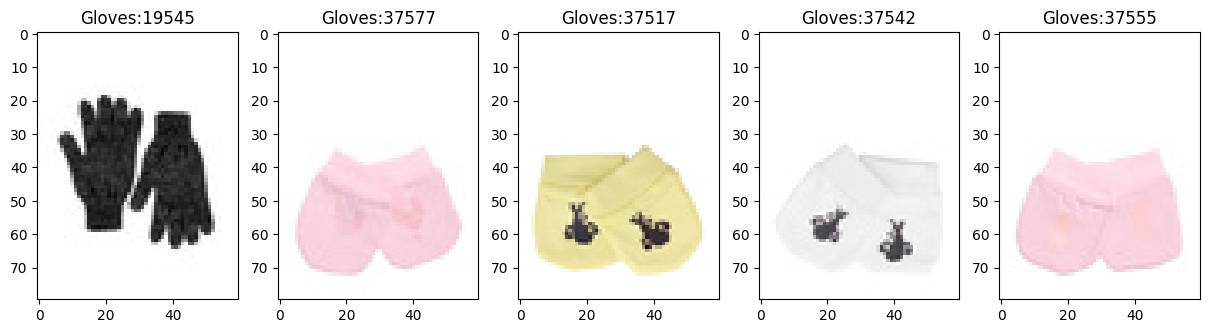

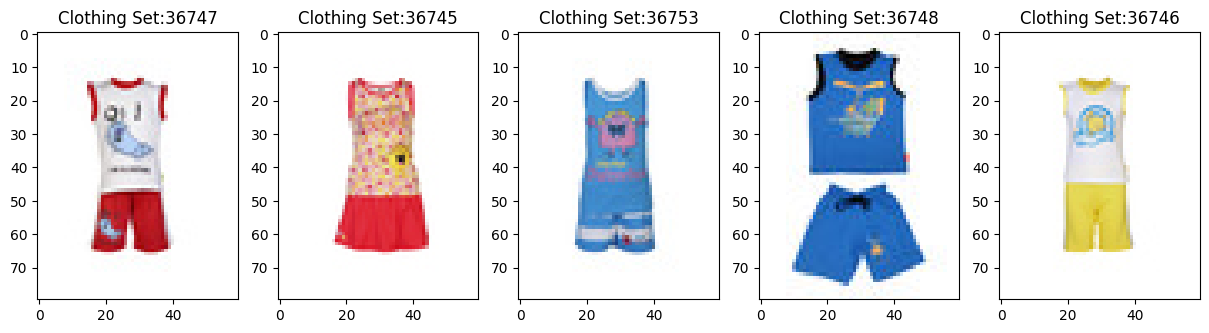

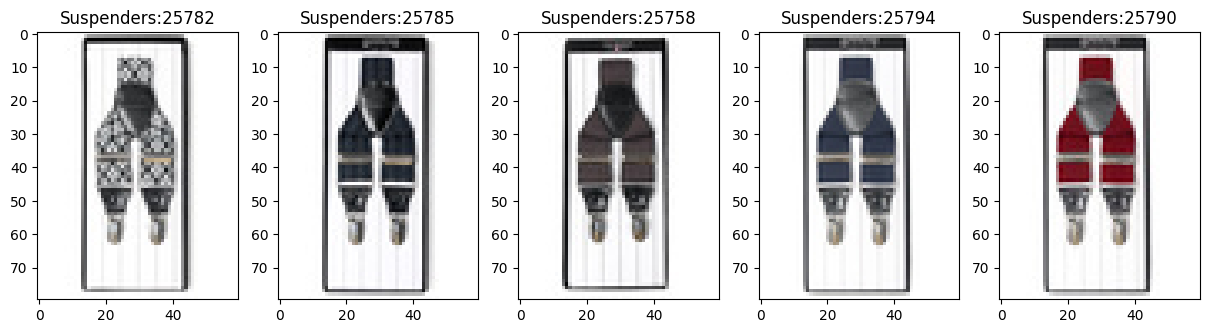

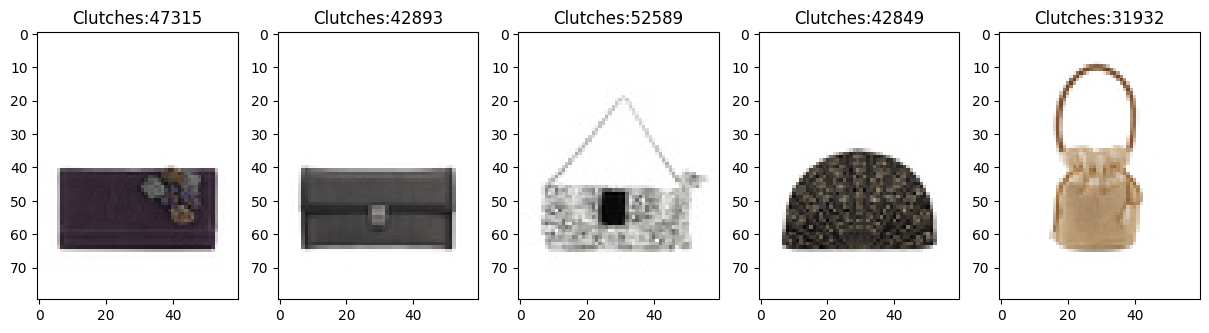

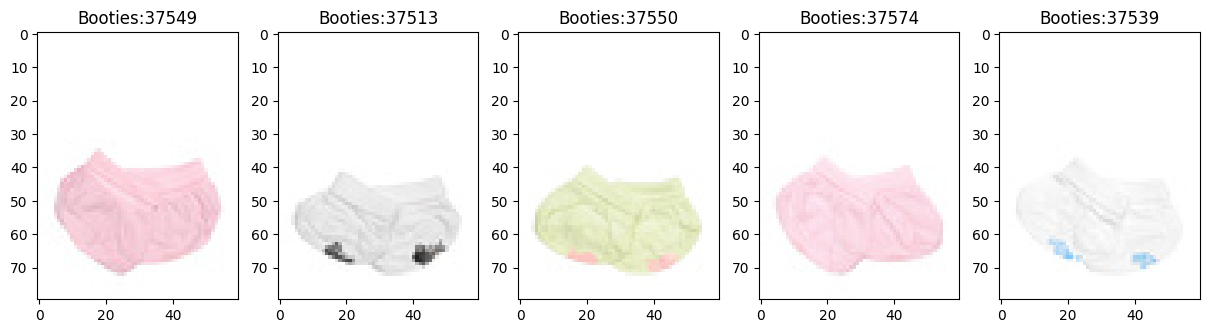

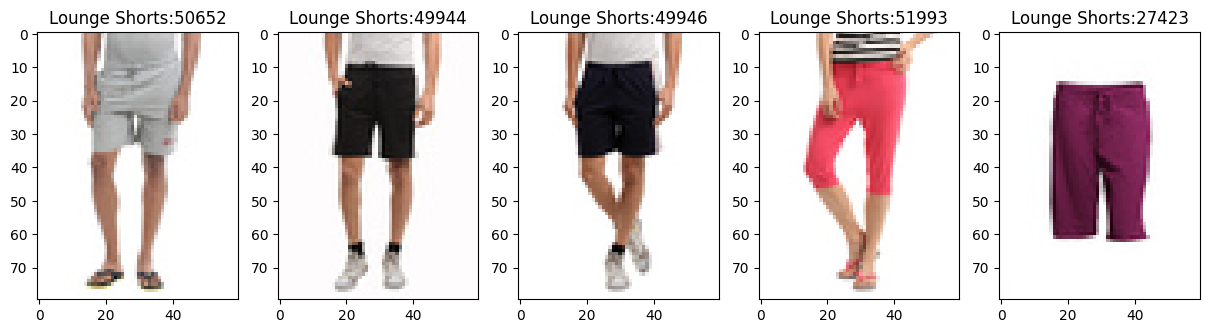

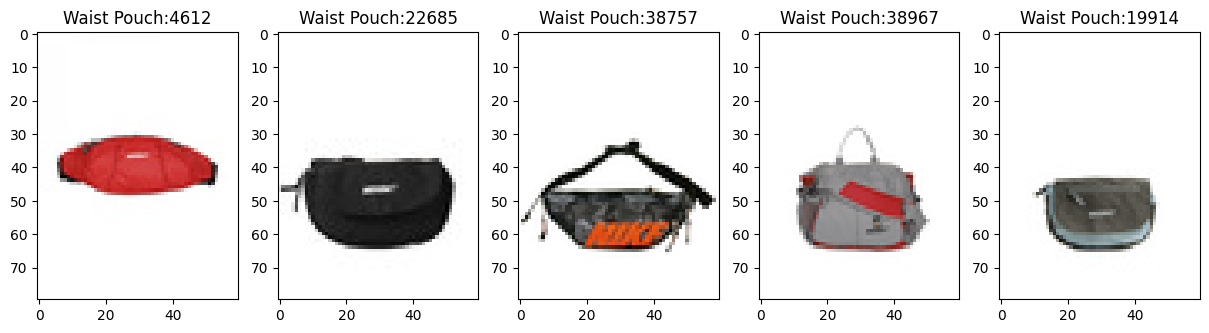

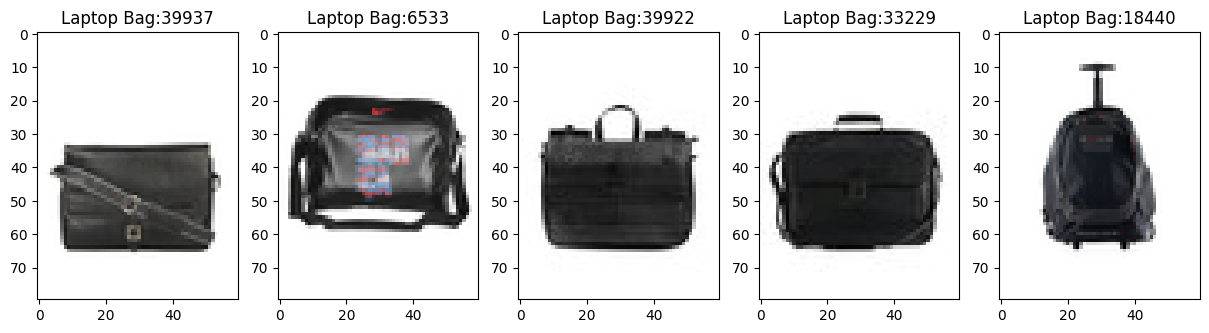

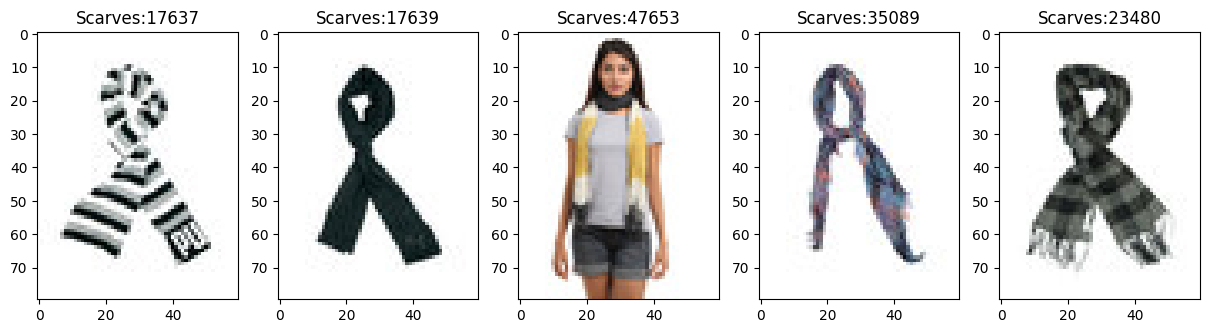

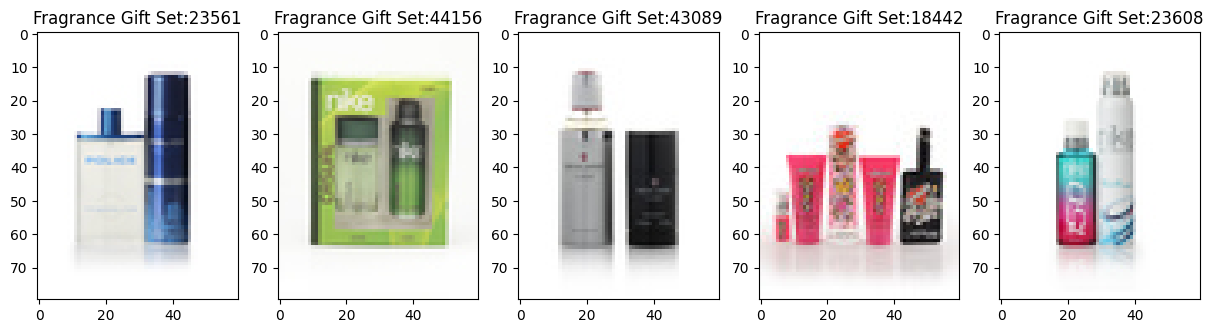

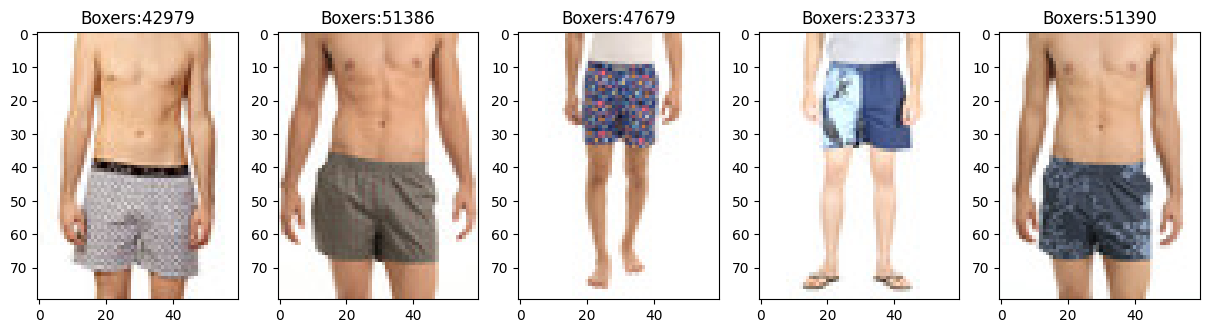

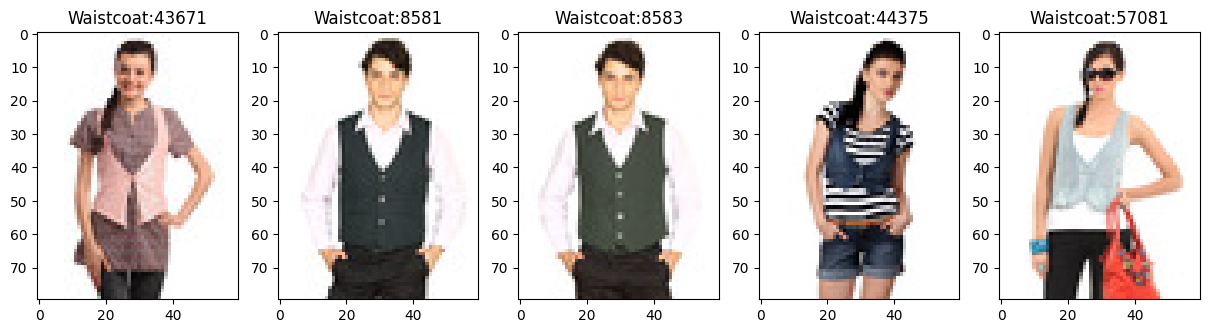

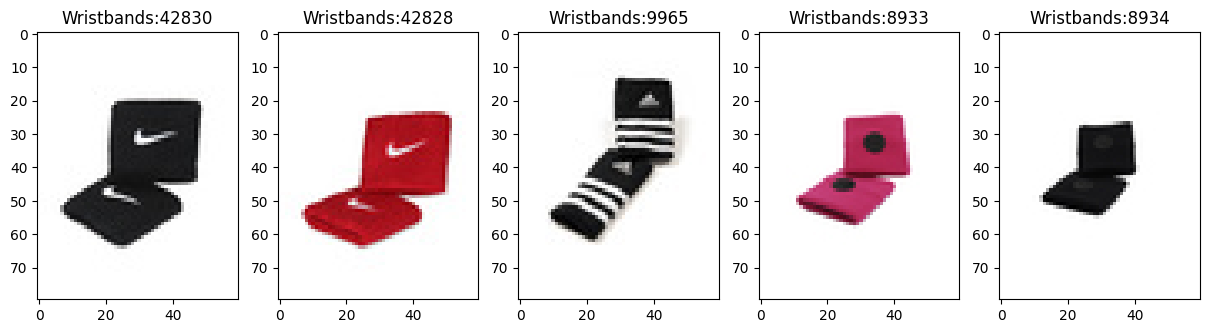

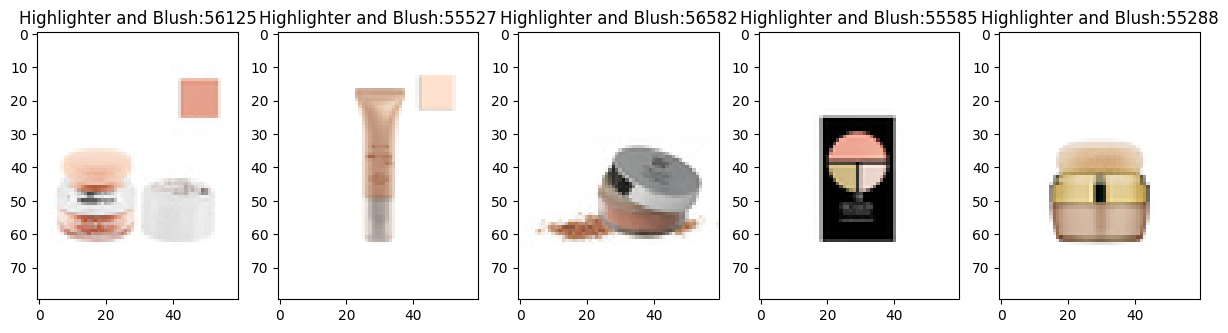

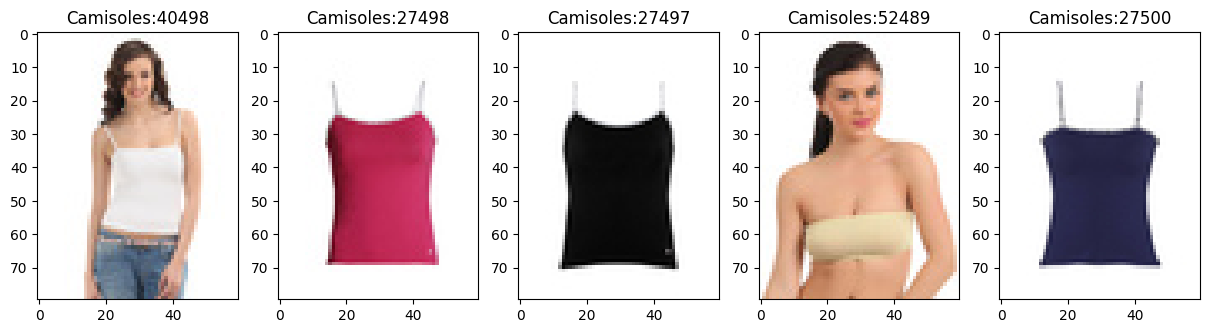

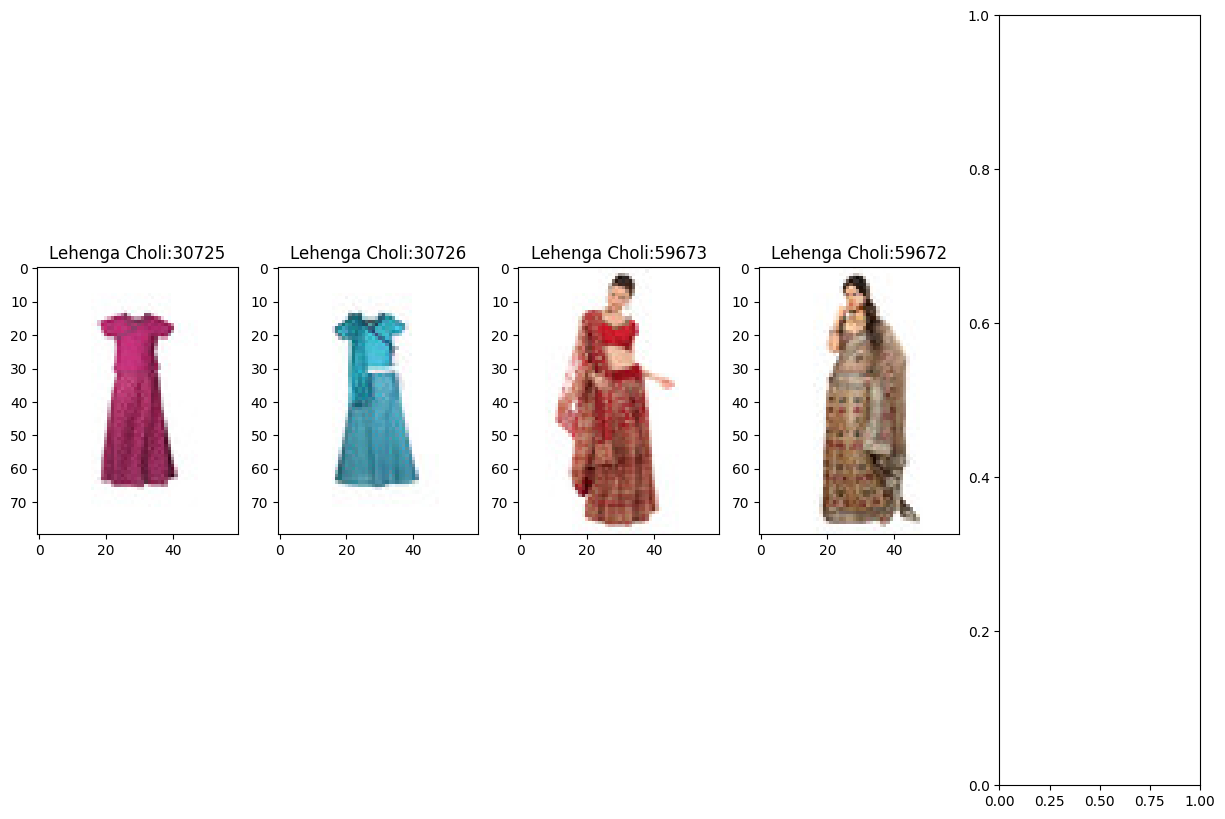

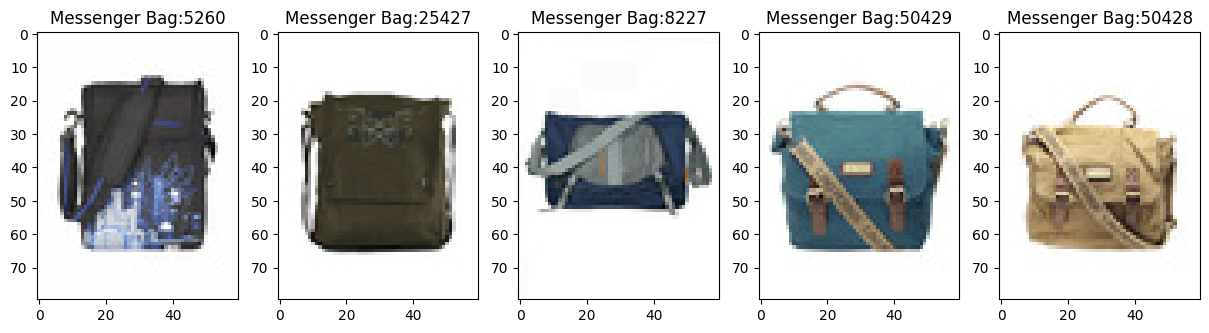

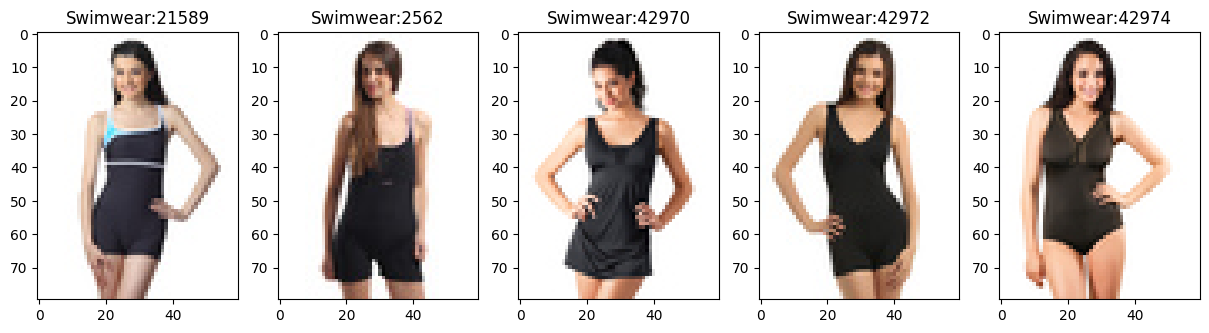

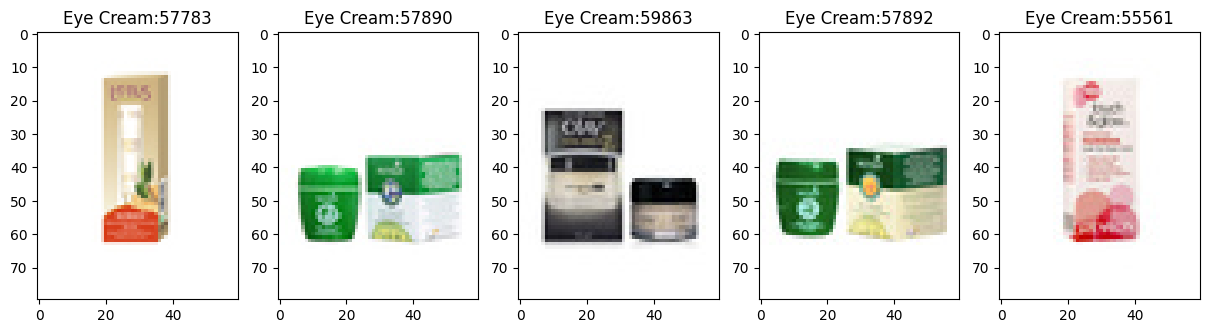

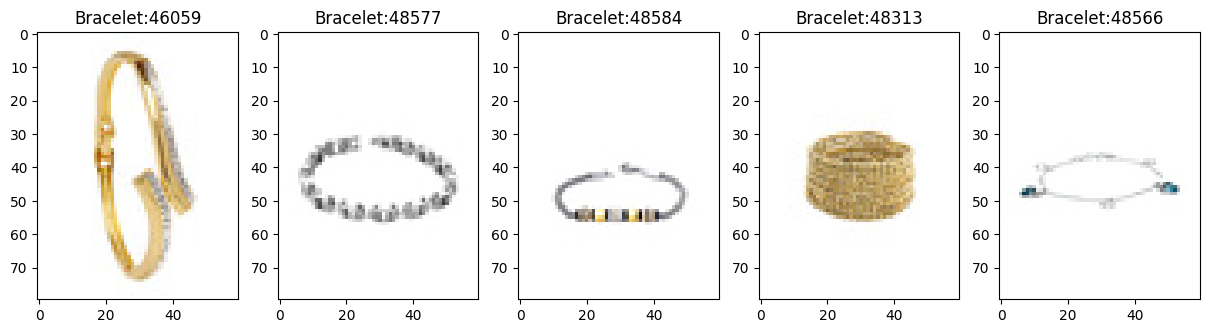

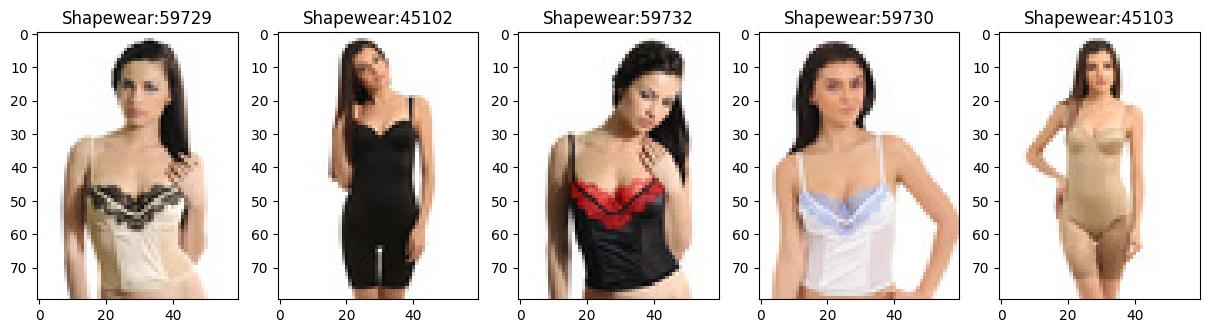

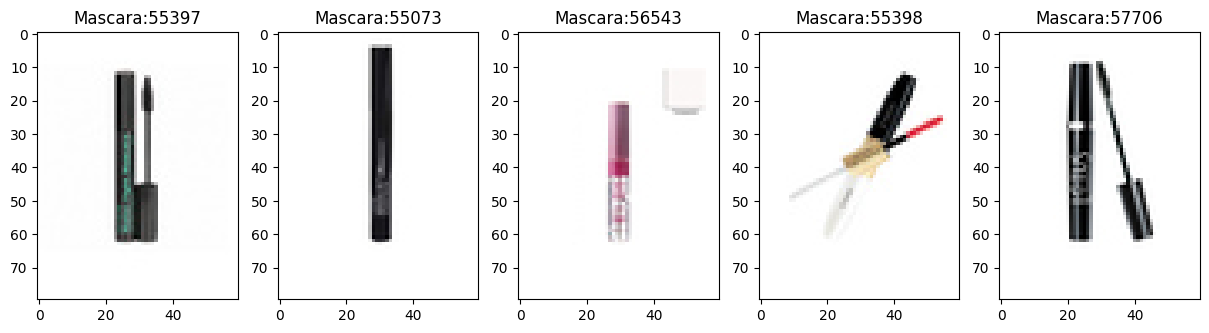

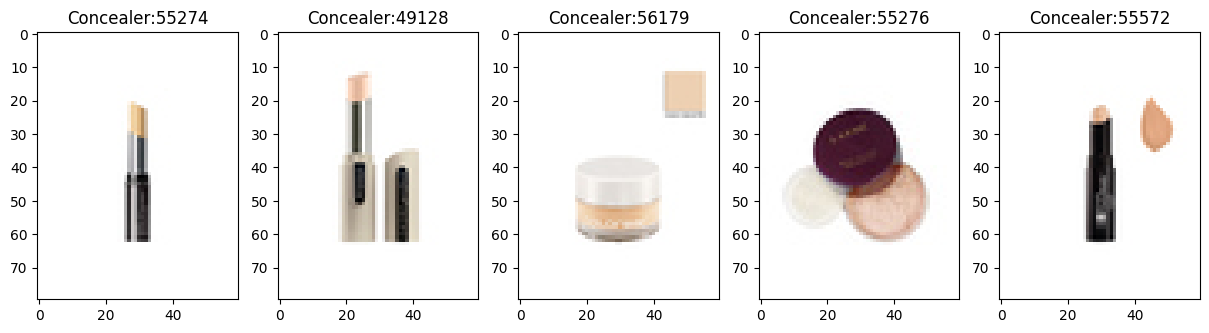

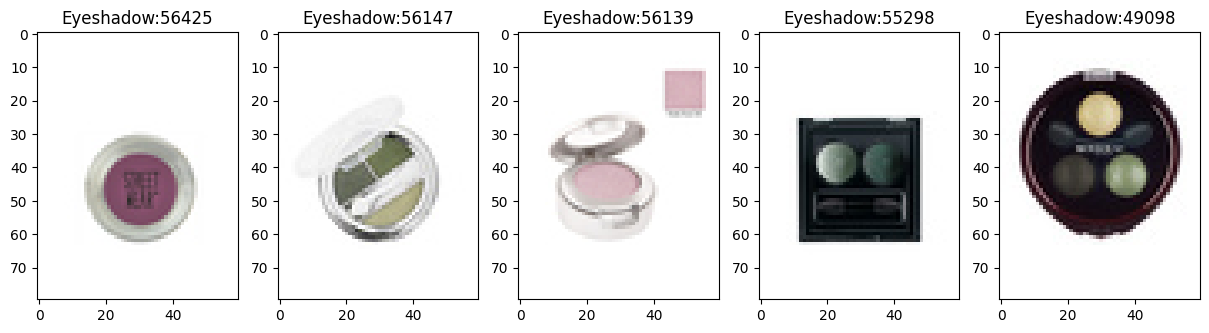

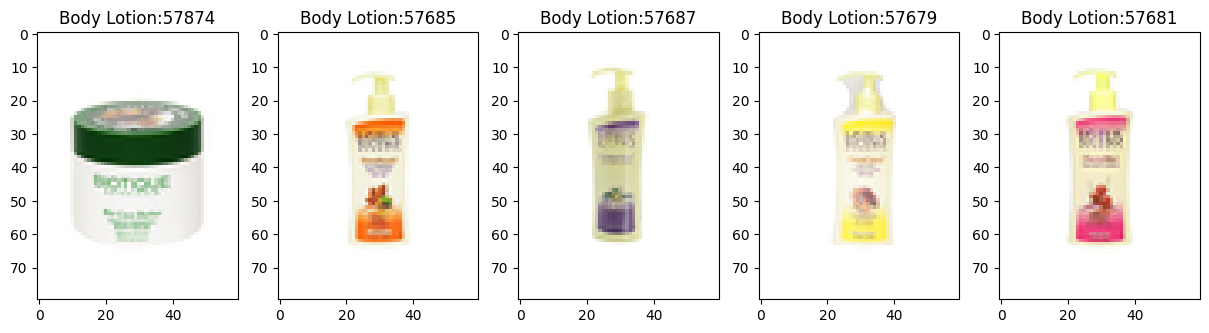

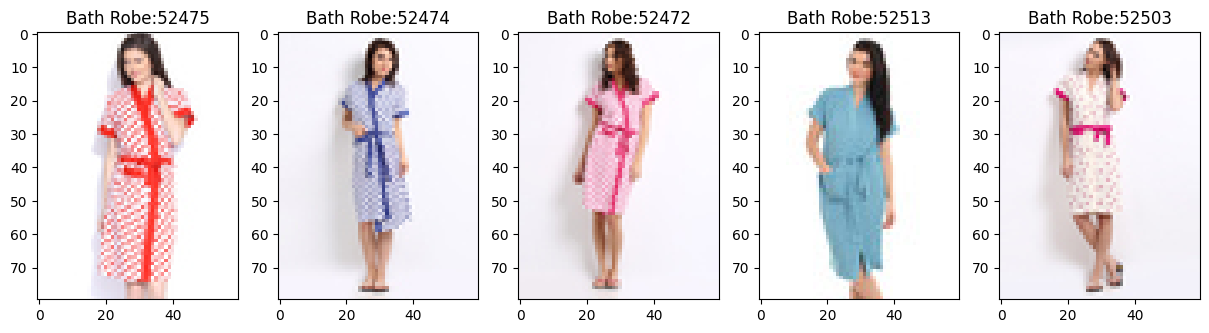

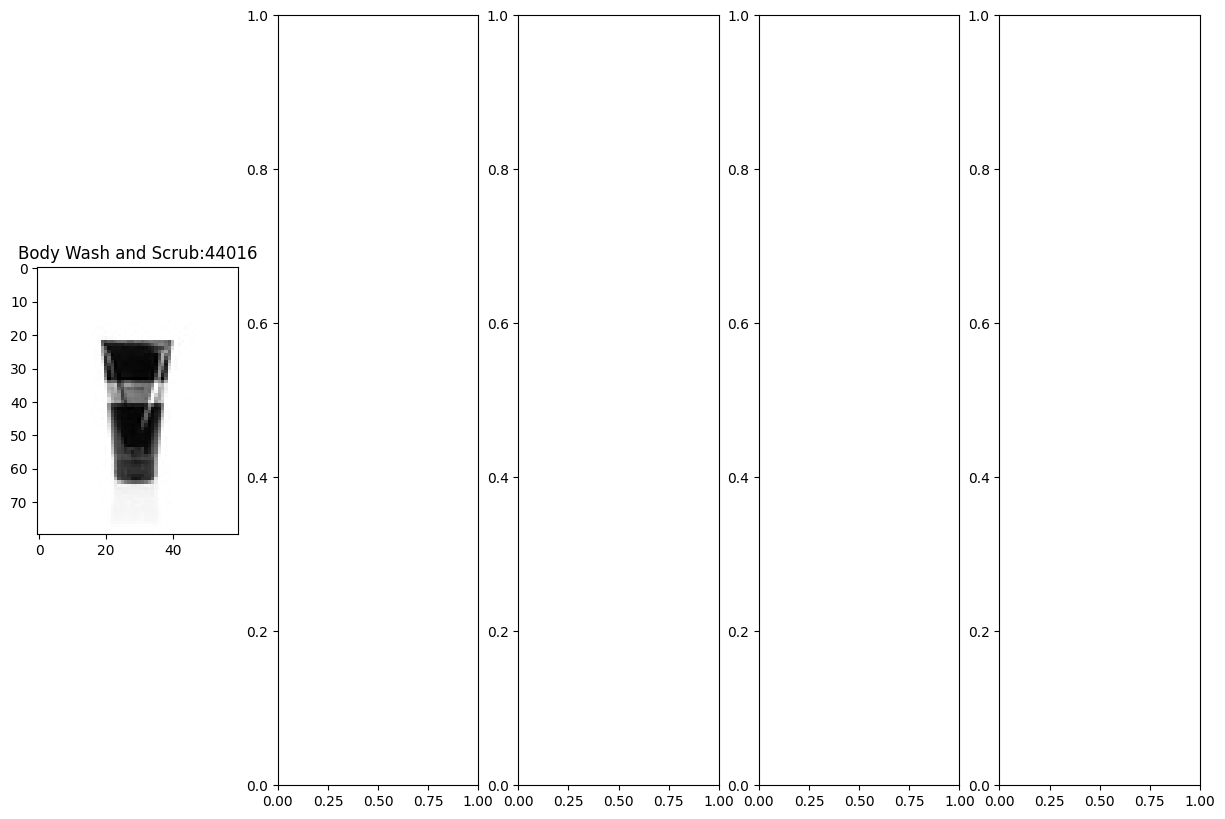

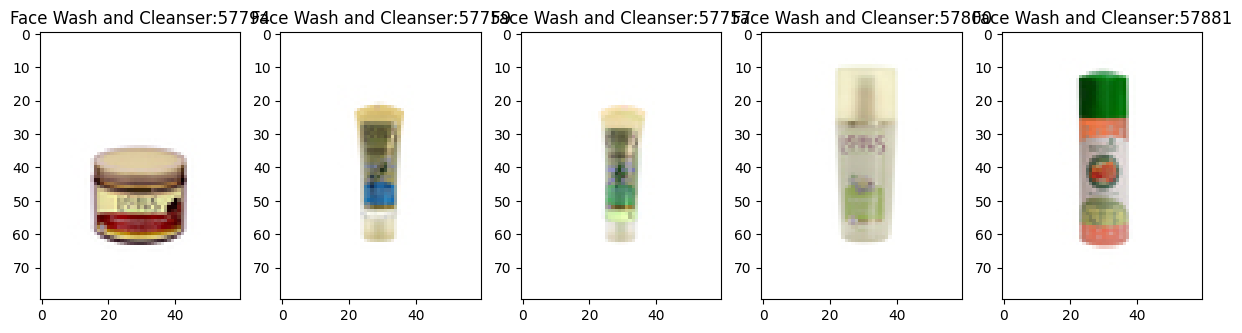

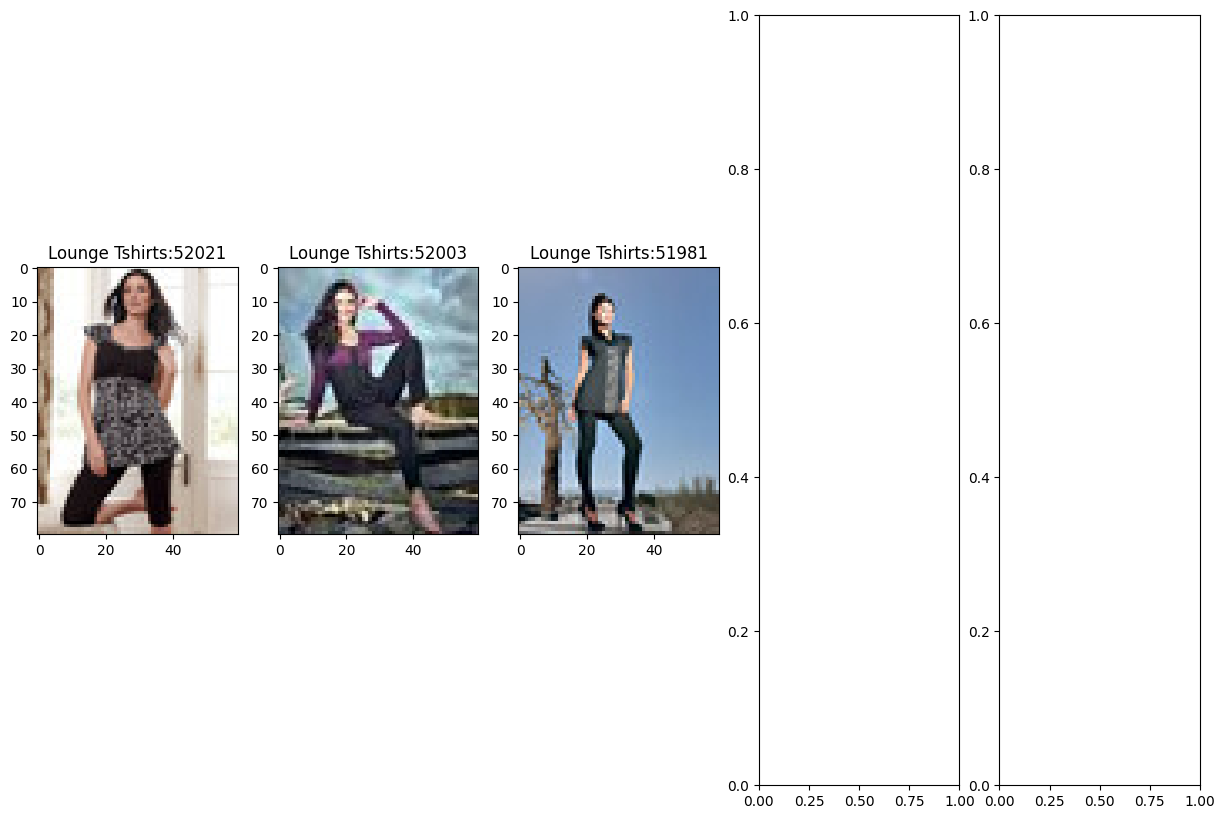

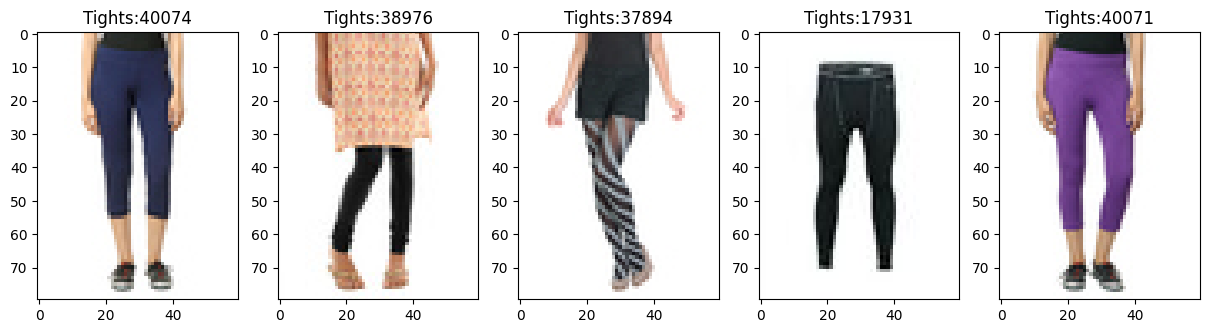

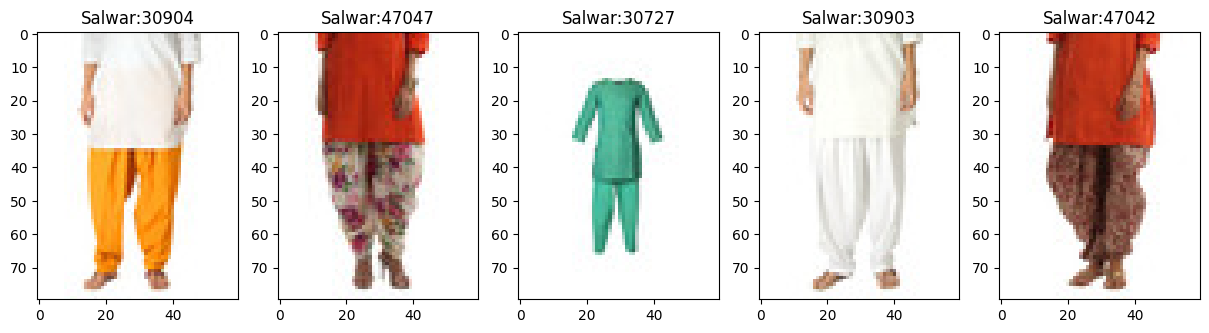

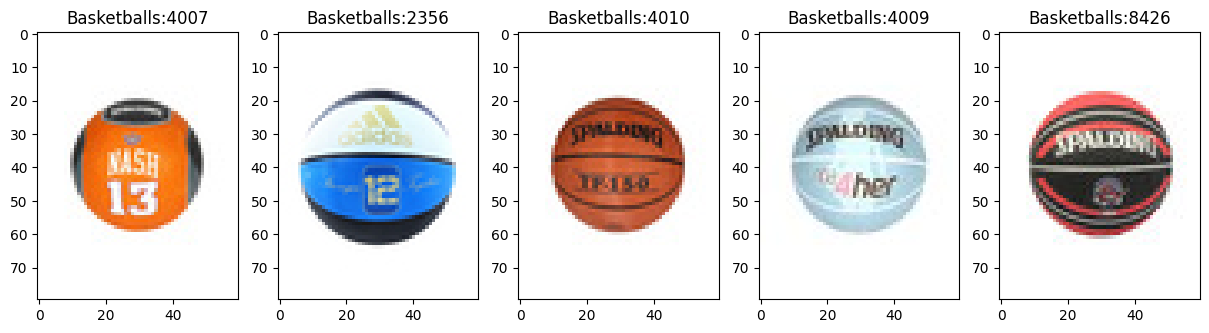

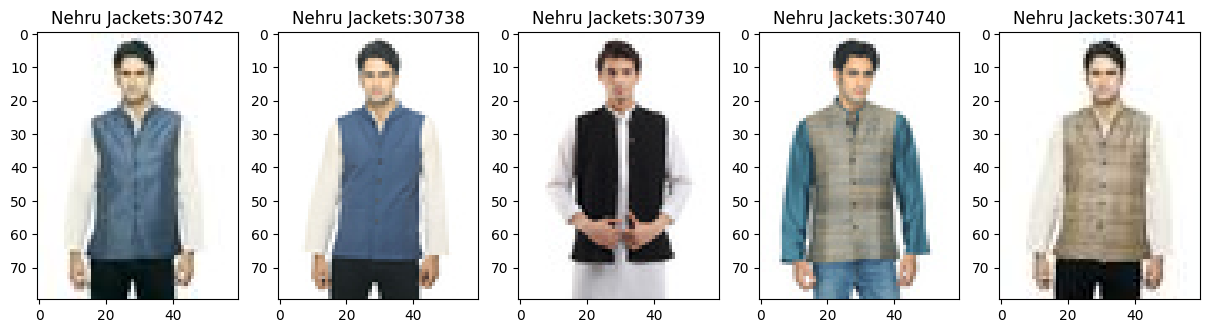

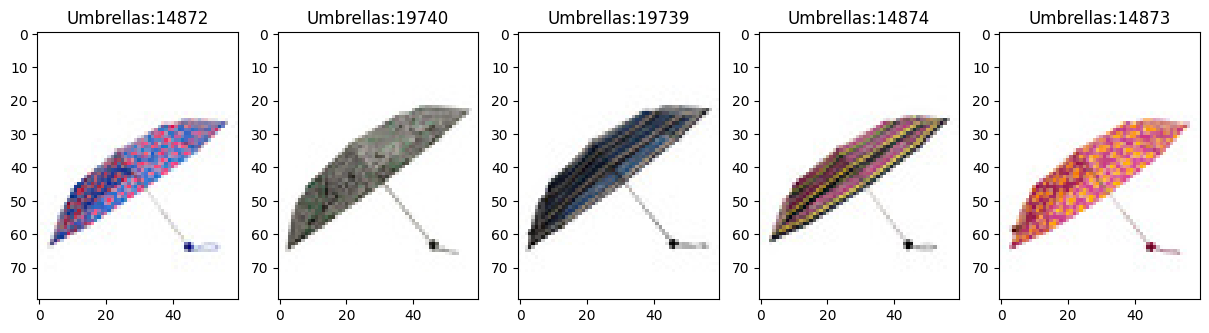

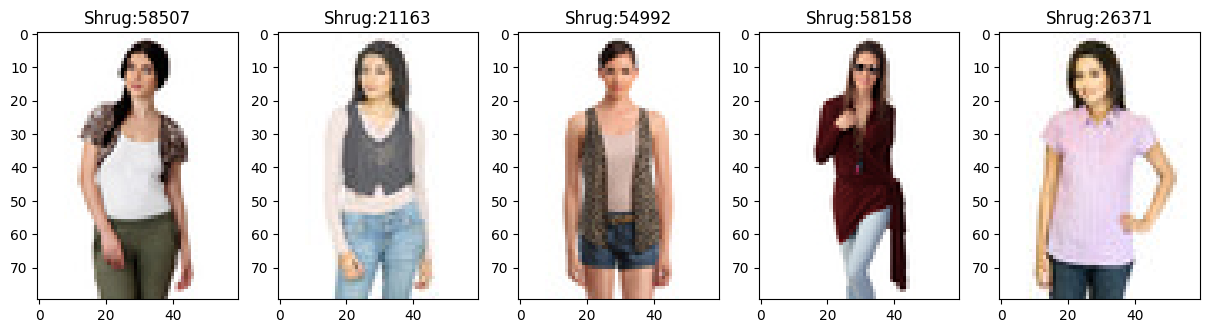

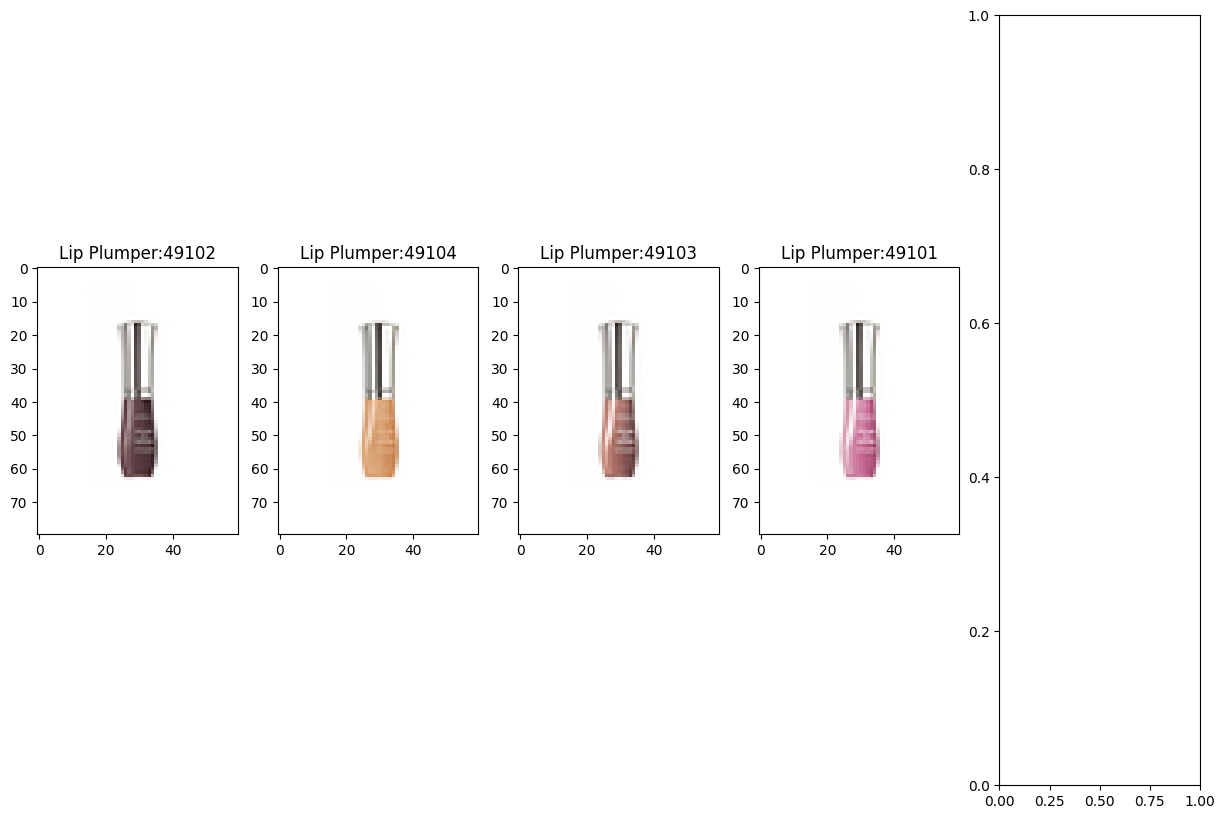

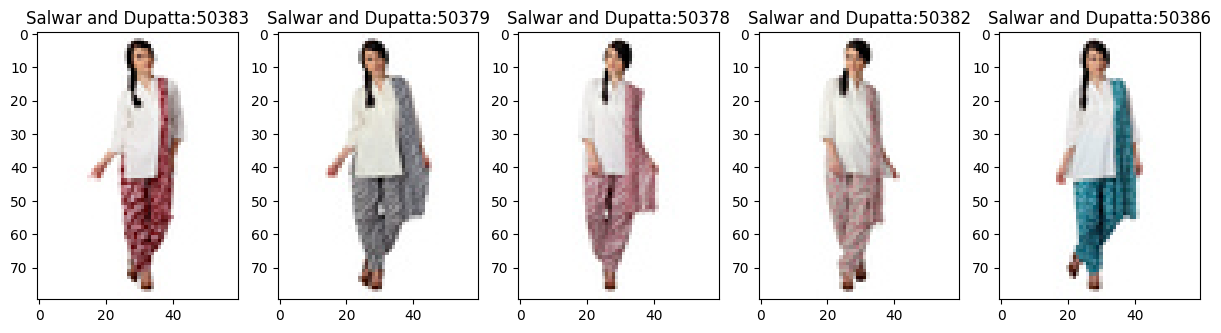

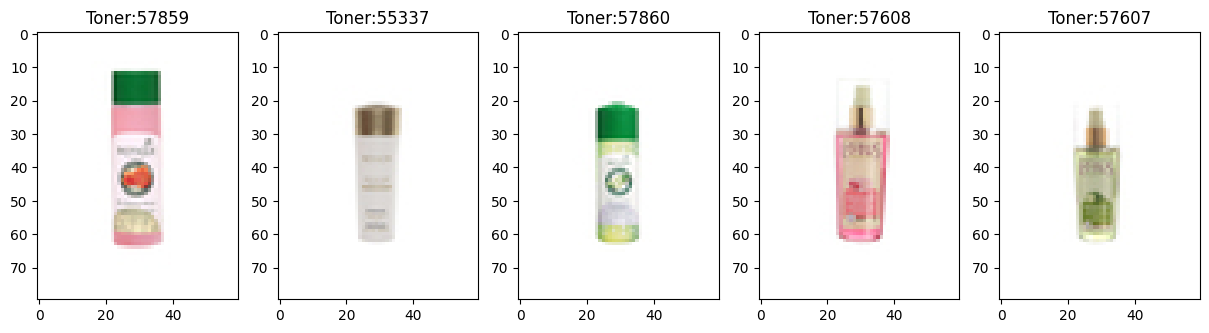

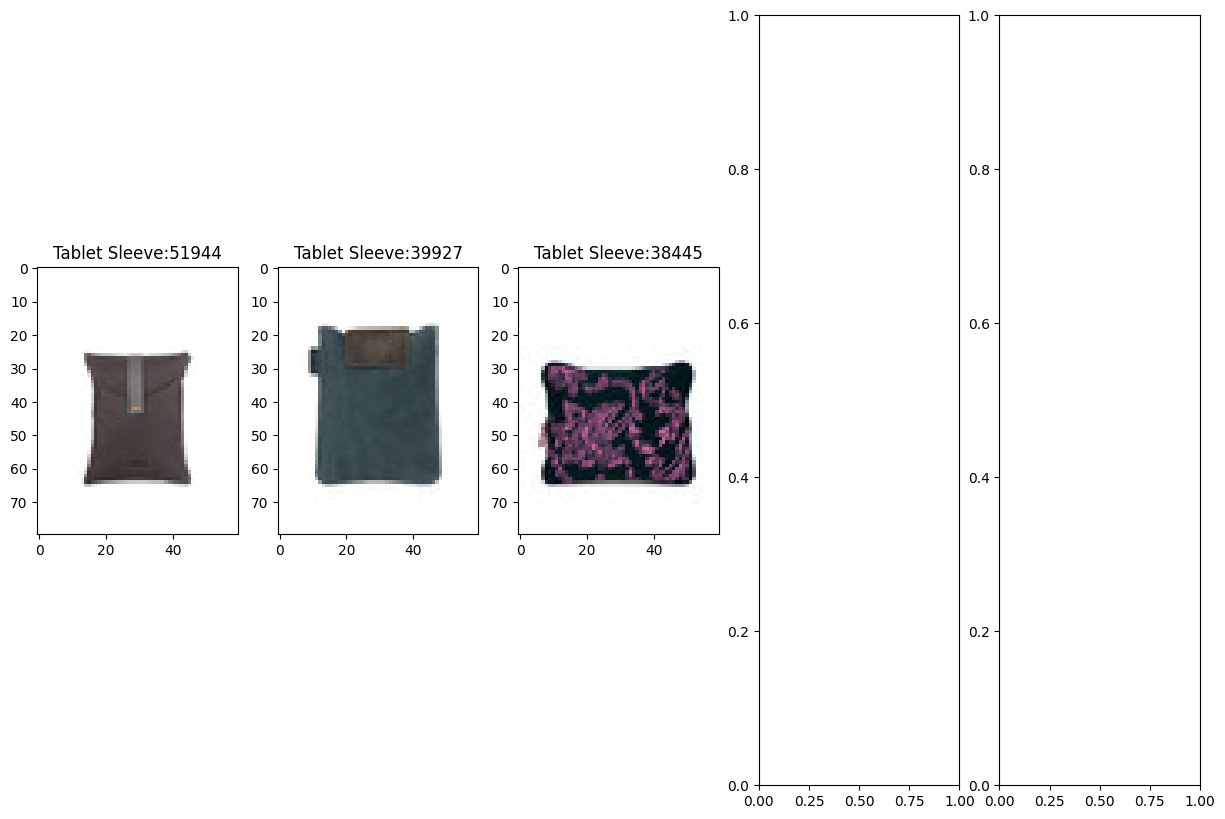

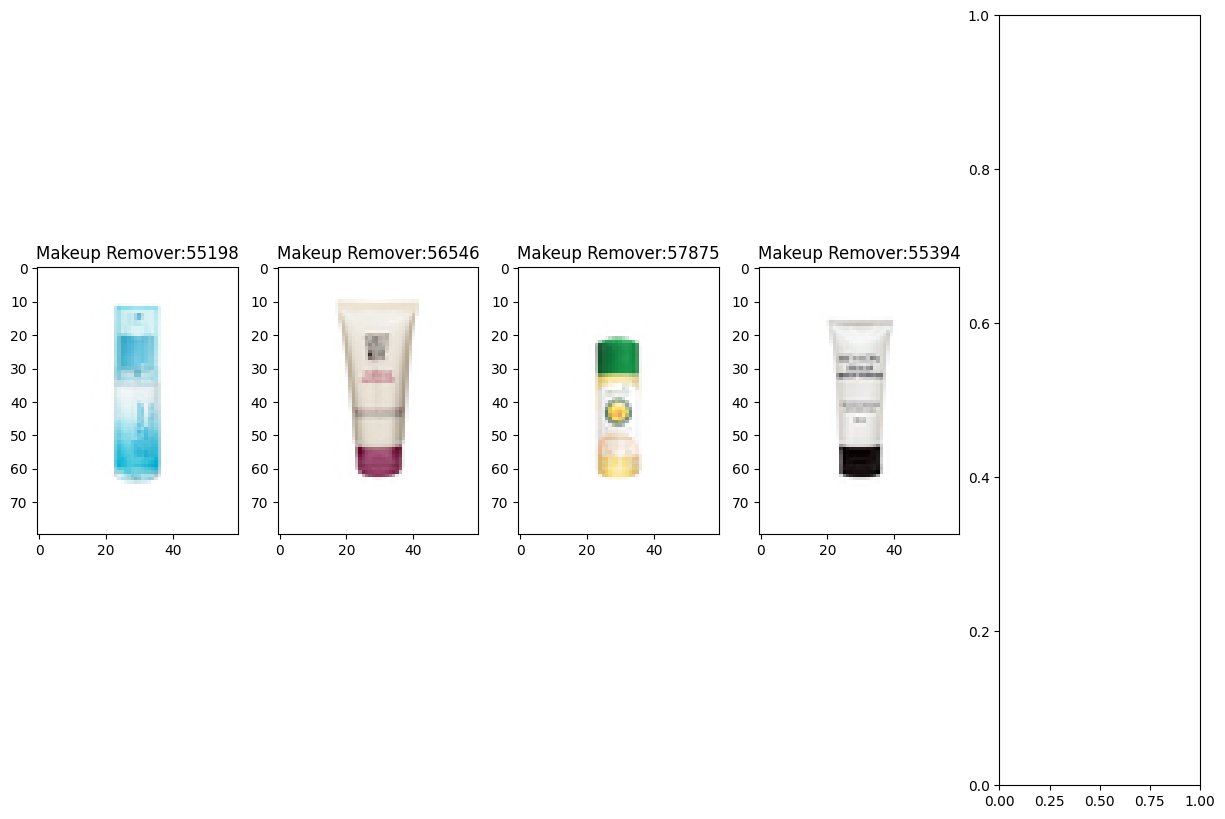

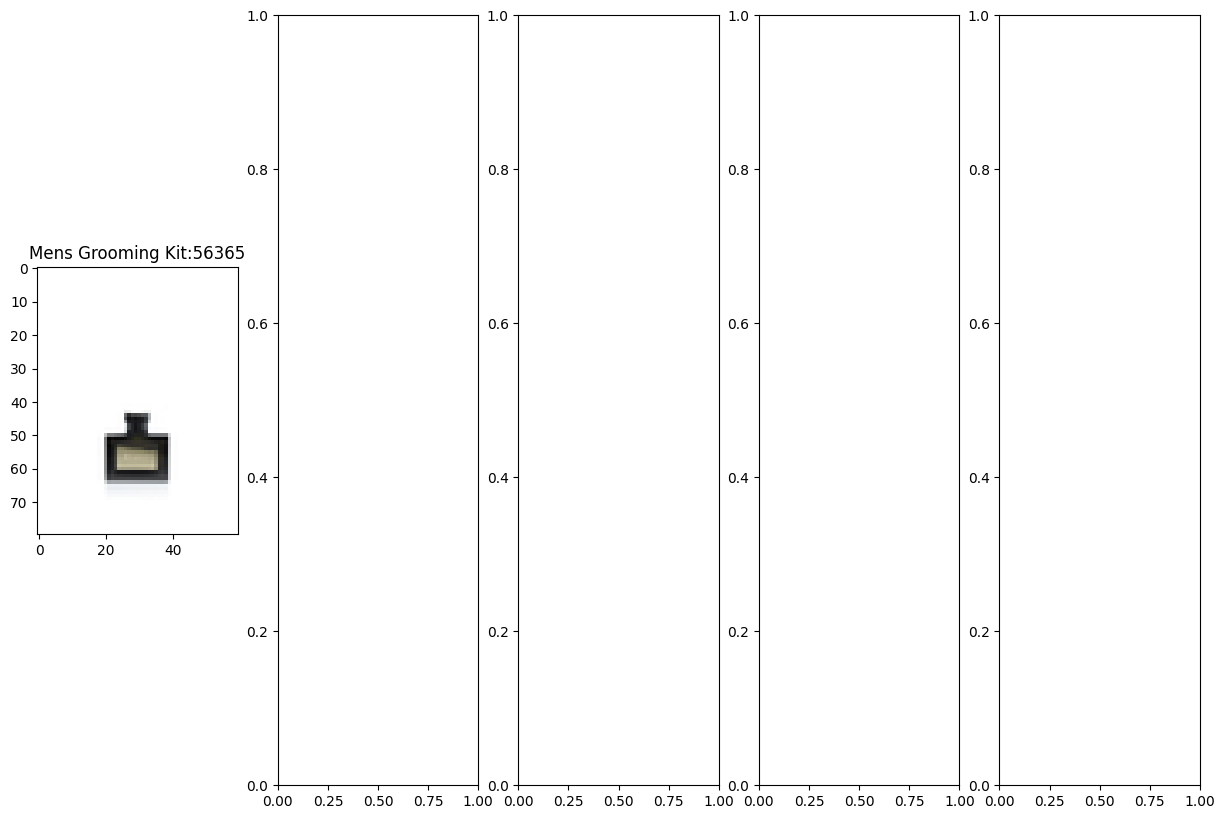

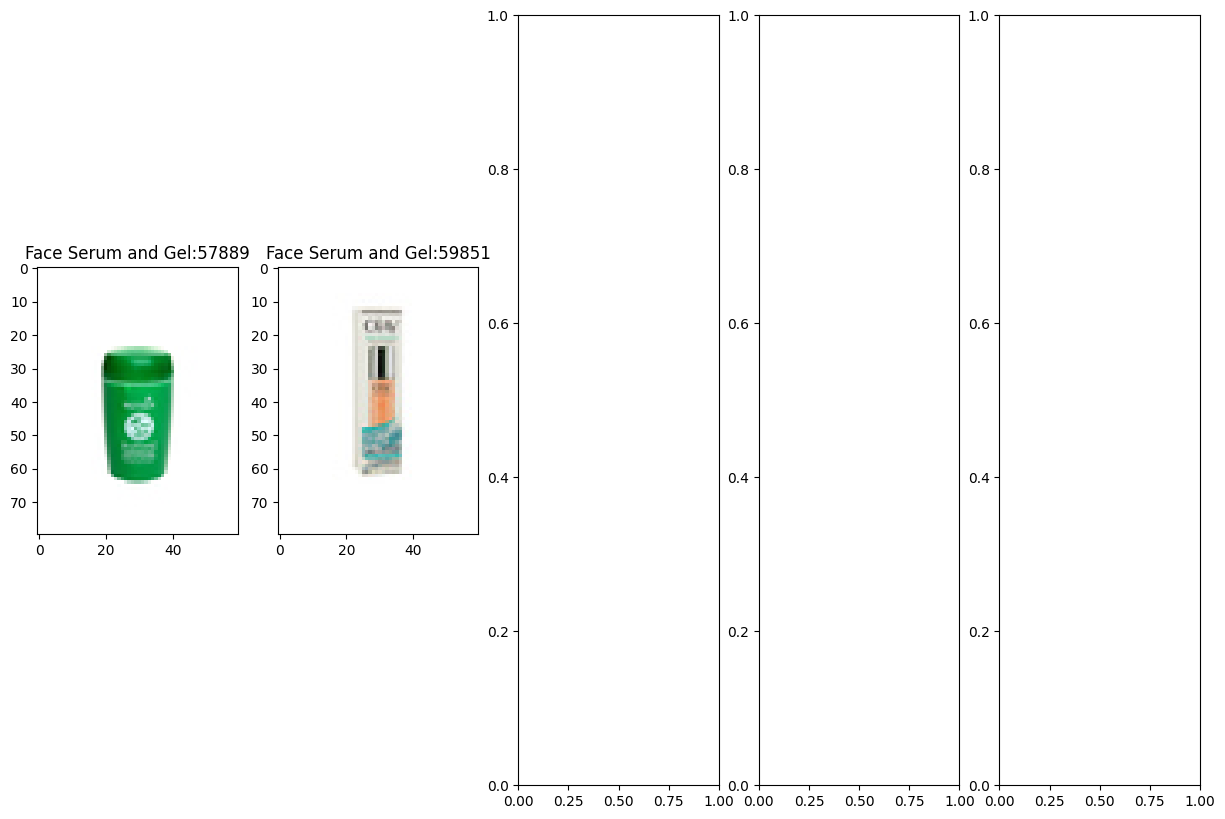

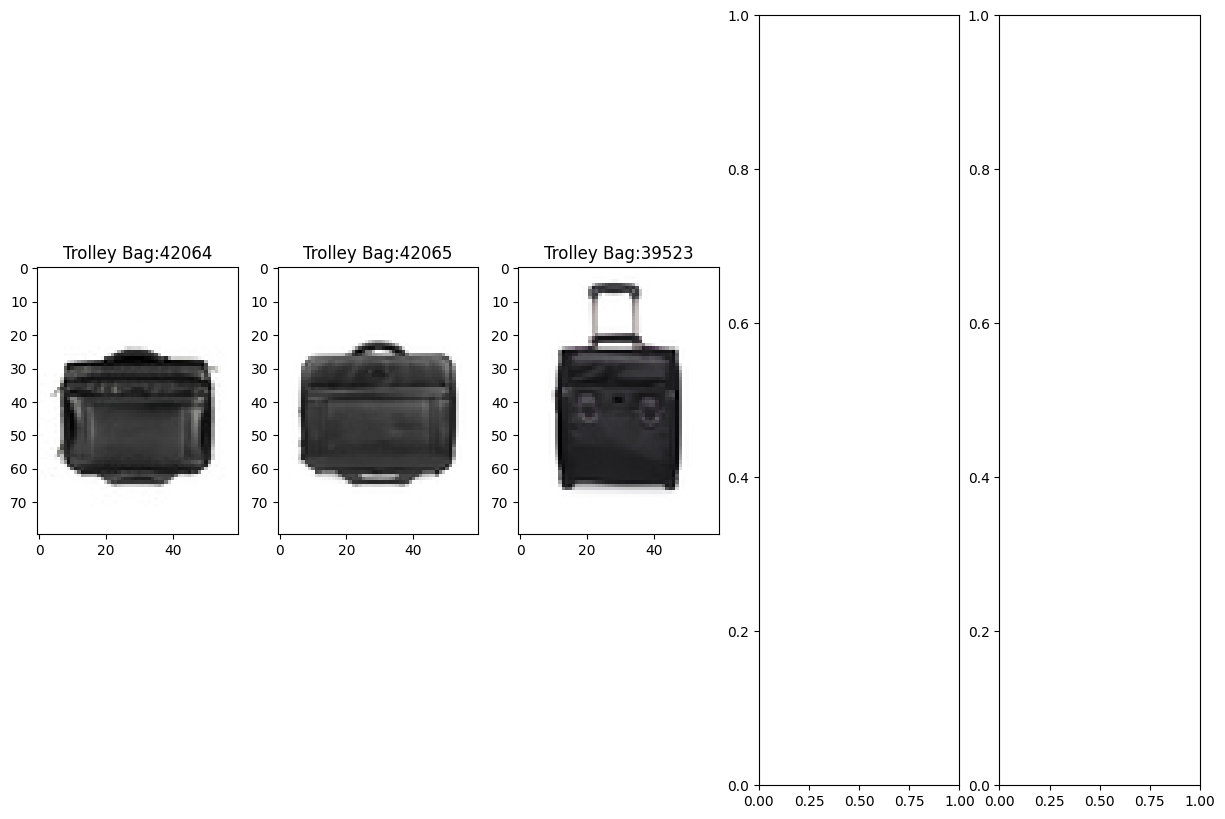

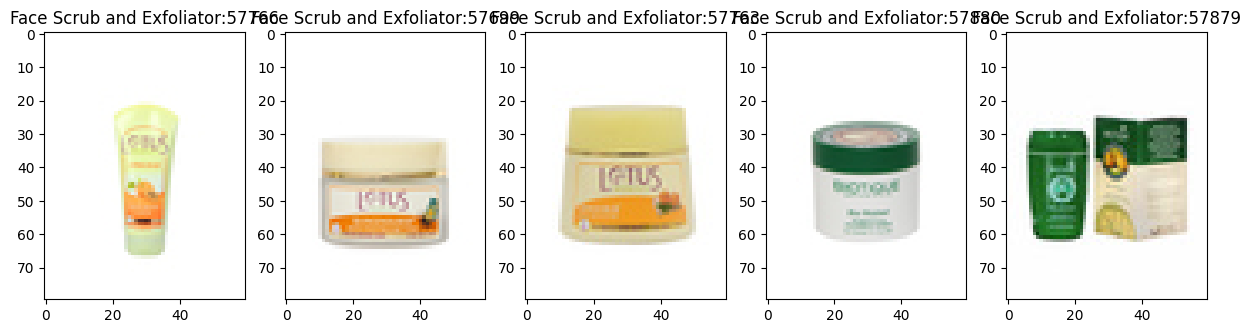

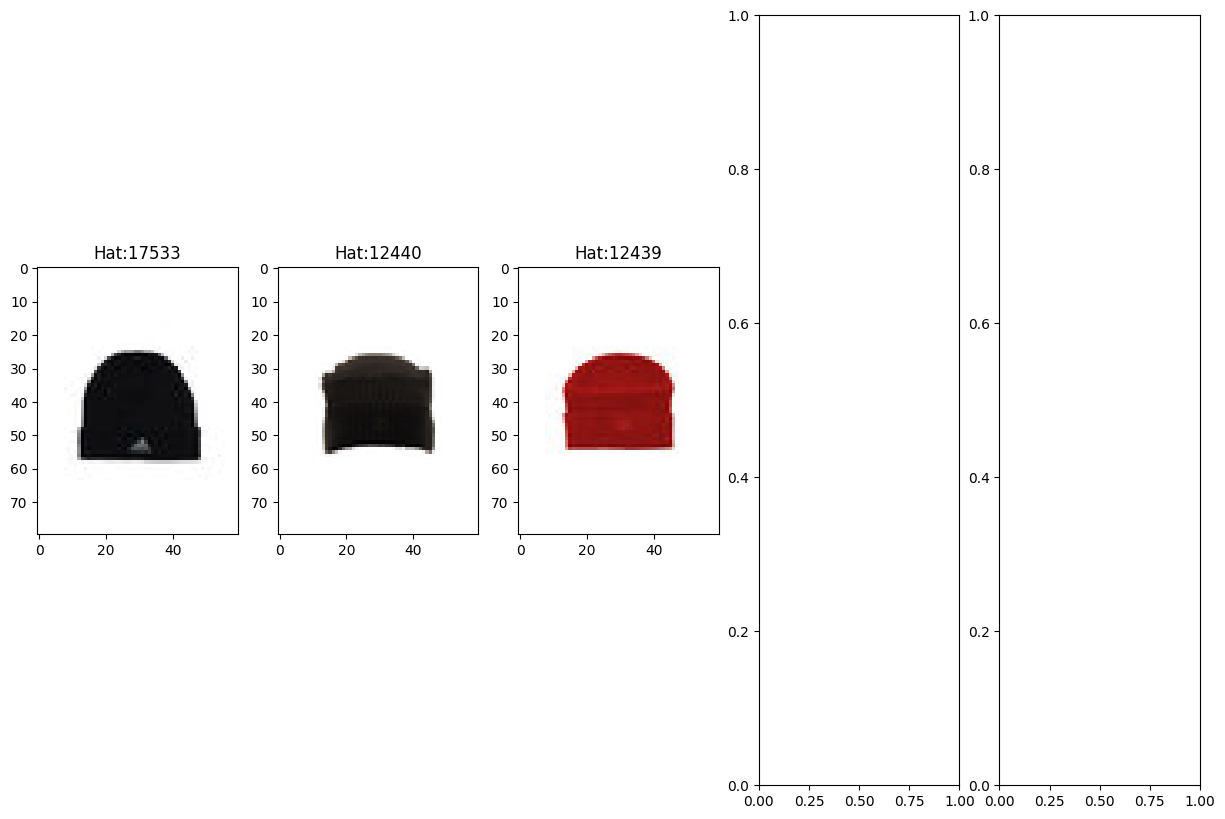

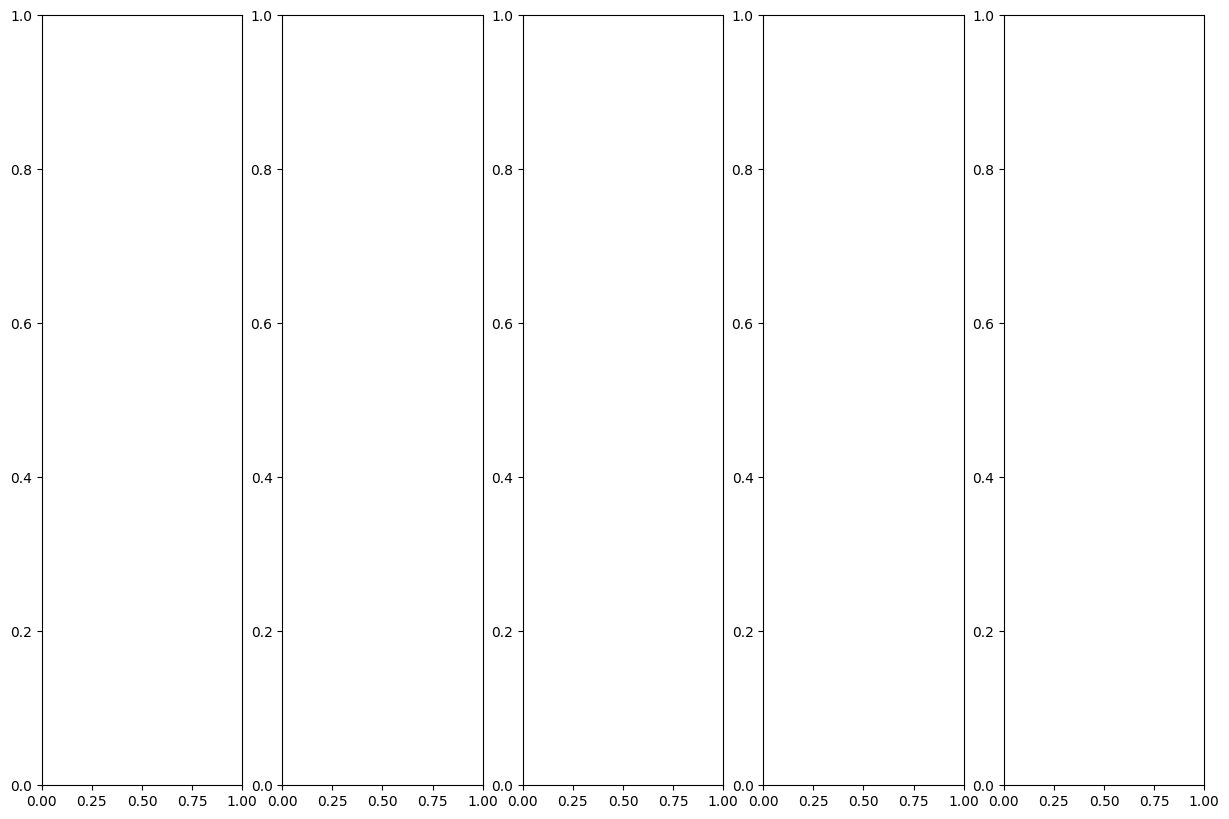

In [3]:
use_cols = ['articleType']

print(use_cols)

for col in use_cols:
    print(col)
    plot_head_5_image(col)
    print('-' * 300)


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def img_to_array_multi_task(path, data):
    img_array = []
   
    articleType_labels = []
   
    articleType_data = data[['id','articleType']]
 
    articleType_names = articleType_data['articleType'].unique()

    articleType_label_dict = {name: i for i, name in enumerate(articleType_names)}

    
    for idx, row in data.iterrows():
        file_id = row['id']

        articleType = row['articleType']
 
        
        
        if f'{file_id}.jpg' not in os.listdir(path):
            print(f'File not found: {file_id}.jpg')
            continue
        
        jpg_path = f'{path}/{file_id}.jpg'
     
        images = plt.imread(jpg_path)
        
        if images.shape != (80, 60, 3):
            continue
        
        img_array.append(images.astype('float32') / 255)
        
     

        articleType_label = np.zeros(len(articleType_names))
        articleType_label[articleType_label_dict[articleType]] = 1
        articleType_labels.append(articleType_label)

    
    return (np.array(img_array), 
            np.array(articleType_labels), 
            articleType_label_dict, 
           )


In [5]:
img_array, articleType_labels,articleType_label_dict = img_to_array_multi_task(images_path, data)

File not found: 12347.jpg
File not found: 39403.jpg
File not found: 39425.jpg
File not found: 39401.jpg
File not found: 39410.jpg


In [6]:
print("ARTICLE TYPE: ")
print(articleType_label_dict)

ARTICLE TYPE: 
{'Casual Shoes': 0, 'Stockings': 1, 'Tshirts': 2, 'Shirts': 3, 'Sunglasses': 4, 'Flip Flops': 5, 'Sports Shoes': 6, 'Watches': 7, 'Tops': 8, 'Sarees': 9, 'Formal Shoes': 10, 'Ties': 11, 'Wallets': 12, 'Heels': 13, 'Trousers': 14, 'Shorts': 15, 'Deodorant': 16, 'Sweaters': 17, 'Kurtis': 18, 'Sandals': 19, 'Jumpsuit': 20, 'Innerwear Vests': 21, 'Handbags': 22, 'Kurtas': 23, 'Lipstick': 24, 'Free Gifts': 25, 'Belts': 26, 'Track Pants': 27, 'Dresses': 28, 'Jeans': 29, 'Blazers': 30, 'Earrings': 31, 'Backpacks': 32, 'Sweatshirts': 33, 'Flats': 34, 'Briefs': 35, 'Trunk': 36, 'Face Moisturisers': 37, 'Rain Jacket': 38, 'Stoles': 39, 'Socks': 40, 'Pendant': 41, 'Bra': 42, 'Hair Colour': 43, 'Skirts': 44, 'Nail Polish': 45, 'Leggings': 46, 'Capris': 47, 'Robe': 48, 'Perfume and Body Mist': 49, 'Tunics': 50, 'Lounge Pants': 51, 'Necklace and Chains': 52, 'Kurta Sets': 53, 'Jackets': 54, 'Kajal and Eyeliner': 55, 'Mufflers': 56, 'Ring': 57, 'Lip Liner': 58, 'Travel Accessory': 59, 

In [7]:
X_train, X_test, y_articleType_train,y_articleType_test = train_test_split(
    img_array, articleType_labels, test_size=0.2, random_state=42
)

In [8]:
input_img = Input(shape=(80, 60, 3))

x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)

articleType_output = Dense(len(articleType_label_dict), activation='softmax', name='articleType_output')(x)

model = Model(inputs=input_img, outputs=[articleType_output])

model.summary()

model.compile(optimizer='adam',
    loss={
          'articleType_output': 'categorical_crossentropy', 
         },
    metrics={
             'articleType_output': 'accuracy',
            }
)



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 80, 60, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 78, 58, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 39, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ articleType_output (Dense)      │ (None, 143)            │     2,141,711 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,161,103 (8.24 MB)

 Trainable params: 2,161,103 (8.24 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    X_train, 
    {
       
        'articleType_output': y_articleType_train, 
        
    }, 
    epochs=10, 
    batch_size=32,
    validation_data=(X_test, {
        
        'articleType_output': y_articleType_test, 
      
    })
)


Epoch 1/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 93s 85ms/step - accuracy: 0.8849 - loss: 0.3415 - val_accuracy: 0.8252 - val_loss: 0.6959
Epoch 2/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 79s 72ms/step - accuracy: 0.9009 - loss: 0.2899 - val_accuracy: 0.8256 - val_loss: 0.6843
Epoch 3/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 70s 64ms/step - accuracy: 0.9150 - loss: 0.2445 - val_accuracy: 0.8314 - val_loss: 0.6956
Epoch 4/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 67s 61ms/step - accuracy: 0.9256 - loss: 0.2151 - val_accuracy: 0.8269 - val_loss: 0.7382
Epoch 5/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 68s 62ms/step - accuracy: 0.9279 - loss: 0.2033 - val_accuracy: 0.8331 - val_loss: 0.7346
Epoch 6/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 73s 67ms/step - accuracy: 0.9381 - loss: 0.1722 - val_accuracy: 0.8316 - val_loss: 0.7984
Epoch 7/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.9401 - loss: 0.1685 - val_accuracy: 0.8385 - val_loss: 0.7779
Epoch 8/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 77s 70ms/step - accuracy: 0.9444 -

In [13]:
model.save('fashion_v3_one_parameter.keras')

In [14]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2

input_img = Input(shape=(80, 60, 3))

x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

articleType_output = Dense(len(articleType_label_dict), activation='softmax', kernel_regularizer=l2(0.01), name='articleType_output')(x)

modelv2 = Model(inputs=input_img, outputs=[articleType_output])

modelv2.compile(optimizer=Adam(),
    loss={
          'articleType_output': 'categorical_crossentropy', 
         },
    metrics={
             'articleType_output': 'accuracy',
            }
)

modelv2.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 80, 60, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 78, 58, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 78, 58, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 39, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 39, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 37, 27, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 18, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 18, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ articleType_output (Dense)      │ (None, 143)            │       732,303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826,447 (3.15 MB)

 Trainable params: 825,999 (3.15 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history2 = modelv2.fit(
    X_train, 
    {
        'articleType_output': y_articleType_train, 
    }, 
    epochs=10, 
    batch_size=32,
    validation_data=(X_test, {
        'articleType_output': y_articleType_test, 
    })
)

Epoch 1/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 163s 145ms/step - accuracy: 0.5605 - loss: 3.6593 - val_accuracy: 0.4853 - val_loss: 2.9869
Epoch 2/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 149s 136ms/step - accuracy: 0.7382 - loss: 1.6551 - val_accuracy: 0.7416 - val_loss: 1.4827
Epoch 3/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 159s 144ms/step - accuracy: 0.7798 - loss: 1.3241 - val_accuracy: 0.7251 - val_loss: 1.5746
Epoch 4/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 147s 134ms/step - accuracy: 0.7826 - loss: 1.3028 - val_accuracy: 0.7213 - val_loss: 1.6043
Epoch 5/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 150s 136ms/step - accuracy: 0.7918 - loss: 1.2634 - val_accuracy: 0.6438 - val_loss: 1.9392
Epoch 6/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 150s 136ms/step - accuracy: 0.8033 - loss: 1.2042 - val_accuracy: 0.7398 - val_loss: 1.5174
Epoch 7/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 151s 137ms/step - accuracy: 0.8089 - loss: 1.1705 - val_accuracy: 0.7745 - val_loss: 1.3783
Epoch 8/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 147s 134ms/step - ac